# Prep

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 70.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install numpy>=1.22.4
!pip install gensim==4.2.0
!pip install --upgrade gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing 

# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/mbti_1_kaggle.csv")
df.info()
display(df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]

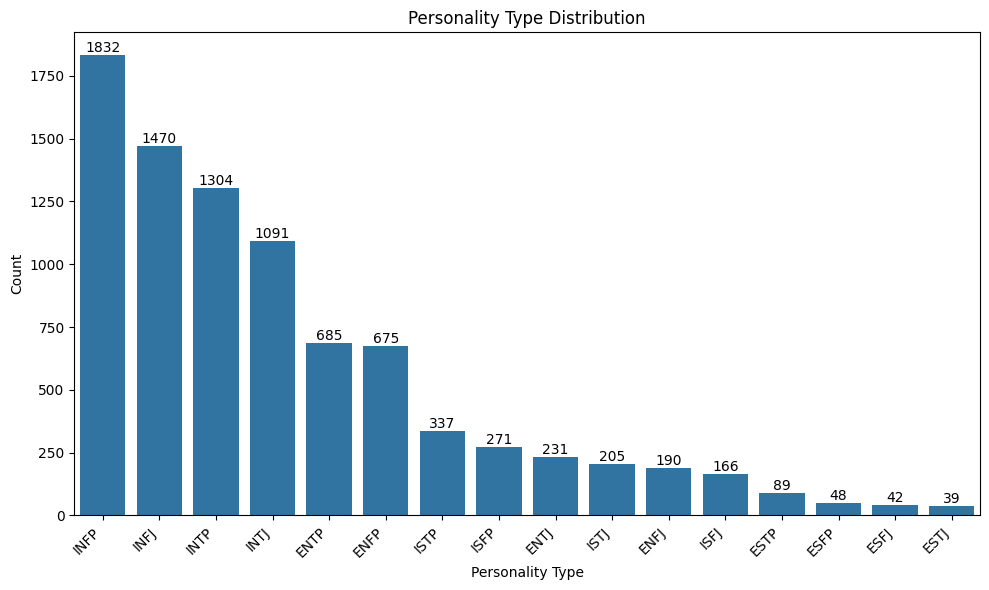

In [ ]:
# Bar graph
plt.figure(figsize=(10, 6))
type_counts = df['type'].value_counts().sort_values(ascending=False)
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.title("Personality Type Distribution")

# Count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop_duplicates()
df = df.dropna()

df.isnull().sum()

type     0
posts    0
dtype: int64

In [ ]:
# Mengecek validitas tipe MBTI
valid_types = {'INFJ', 'INTJ', 'ENTP', 'INTP', 'ENTJ', 'INFP', 'ENFP', 'ISTJ',
               'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP', 'ENFJ'}
invalid_types = set(df['type']) - valid_types
print("Invalid types:", invalid_types)

Invalid types: set()


In [ ]:
import pandas as pd

# Filter data untuk kelas INFP
infp_data = df[df['type'] == 'INFP']

# Tampilkan beberapa baris pertama
print(infp_data.head())
infp_data.to_csv("infp_data.csv", index=False)


    type                                              posts
17  INFP  'I think we do agree. I personally don't consi...
19  INFP  'That's normal, it happens also to me. If I am...
23  INFP  '45016 urh sorry uh. couldn't resist.|||all of...
25  INFP  'Personally, I was thinking this would be more...
28  INFP  'Basically, my main questions are : What do yo...


# Pre-processing Data

## Text Cleansing

In [ ]:
# Text Cleansing
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    parts = text.split('|||')

    cleaned_parts = []
    for p in parts:
        p = re.sub(r'http\S+|www\S+|https\S+', '', p)  # Hapus URL
        p = ' '.join([word for word in p.split() if word not in stop_words])  # Hapus stopwords
        p = re.sub(r'[^a-zA-Z\s]', '', p)              # Hapus karakter non-huruf
        p = p.lower()
        cleaned_parts.append(p.strip())

    return ' '.join(cleaned_parts)

df['cleaned_posts'] = df['posts'].apply(clean_text)

df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/1_cleaned.csv', index=False)
display(df)

type                                              posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1     ENTP  'I'm finding the lack of me in these posts ver...   
2     INTP  'Good one  _____   https://www.youtube.com/wat...   
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4     ENTJ  'You're fired.|||That's another silly misconce...   
...    ...                                                ...   
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...   
8671  ENFP  'So...if this thread already exists someplace ...   
8672  INTP  'So many questions when i do these things.  I ...   
8673  INFP  'I am very conflicted right now when it comes ...   
8674  INFP  'It has been too long since I have been on per...   

                                          cleaned_posts  
0       enfp intj moments sportscenter top ten plays...  
1     im finding lack posts alarming sex boring posi...  
2     good one of course i say i know thats blessing...  
3     dear intp i enjoyed conversation day esoteric ...  
4     youre fired thats another silly misconception ...  
...                                                 ...  
8670   ixfp i always think cats fi doms reason espec...  
8671  soif thread already exists someplace else whic...  
8672  so many questions things i would take purple p...  
8673  i conflicted right comes wanting children i ho...  
8674  it long since i personalitycafe  although seem...  

[8675 rows x 3 columns]

In [ ]:
# # Text Cleansing
# import re
# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))
# def clean_text(text):
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Remove URL

#     text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove special characters and numbers

#     text = text.replace('|||', ' ') # Remove delimiter '|||'

#     text = re.sub(r'[^\w\s]', '', text) # Remove punctuations

#     text = ' '.join([word for word in text.split() if word.lower() not in stop_words]) # Remove stopwords

#     text = text.lower() # Lowercasing

#     text = ' '.join(text.split())# Remove extra whitespaces
#     return text

# df['cleaned_posts'] = df['posts'].apply(clean_text)

# display(df)
# df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/cleaned_text_mbti.csv', index=False)

## Lemmatization

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def spacy_lemmatize(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_punct and not token.is_space])

def limit_text_length(text, max_words=1024):
    words = text.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words])
    return text

df['cleaned_posts_limited'] = df['cleaned_posts'].apply(limit_text_length)
df['lemmatized_posts'] = df['cleaned_posts_limited'].apply(spacy_lemmatize)

df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/lemmatized_spacy.csv', index=False)

In [ ]:
# import nltk
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('tagsets')

# from nltk import pos_tag, word_tokenize
# from nltk.corpus import wordnet
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# # tag POS dari NLTK ke WordNet
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN  # fallback default

# # Fungsi lemmatization per baris (dengan POS tagging)
# def lemmatize_text_pos(text):
#     tokens = word_tokenize(text)
#     pos_tags = pos_tag(tokens)
#     lemmatized_tokens = [
#         lemmatizer.lemmatize(token, get_wordnet_pos(pos))
#         for token, pos in pos_tags
#     ]
#     return ' '.join(lemmatized_tokens)

# df['lemmatized_posts'] = df['cleaned_posts'].apply(lemmatize_text_pos)

# df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/2_lemmatized.csv', index=False)

In [ ]:
# # Lemmatization
# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#   tokens = nltk.word_tokenize(text)
#   lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
#   return " ".join(lemmatized_tokens)

# df['lemmatized_posts'] = df['cleaned_posts'].apply(lemmatize_text)
# display(df)

In [ ]:
df = df.drop(columns=['posts'])
df = df.drop(columns=['cleaned_posts'])
df = df.drop(columns=['cleaned_posts_limited'])

# df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/6_lemmatized.csv', index=False)
df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/new_lemmatized.csv', index=False)

df

type                                   lemmatized_posts
0     INFJ  enfp intj moments sportscenter top ten play pr...
1     ENTP  I m find lack post alarm sex boring position o...
2     INTP  good one of course I say I know that s blessin...
3     INTJ  dear intp I enjoy conversation day esoteric ga...
4     ENTJ  you re fire that s another silly misconception...
...    ...                                                ...
8670  ISFP  ixfp I always think cat fi dom reason especial...
8671  ENFP  soif thread already exist someplace else which...
8672  INTP  so many question thing I would take purple pil...
8673  INFP  I conflict right come want child I honestly ma...
8674  INFP  it long since I personalitycafe although seem ...

[8675 rows x 2 columns]

In [ ]:
# # Lemmatization
# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# def lemmatize_tokens(tokens):
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     return lemmatized_tokens

# df['lemmatized_posts'] = df['cleaned_posts'].apply(lemmatize_tokens)
# display(df)

# df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/lemmatized_text_mbti.csv', index=False)


## Label Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(df['type'])

df['encoded_type'] = label_encoder.transform(df['type'])

print(df[['type','encoded_type']])
display(df)

      type  encoded_type
0     INFJ             8
1     ENTP             3
2     INTP            11
3     INTJ            10
4     ENTJ             2
...    ...           ...
8670  ISFP            13
8671  ENFP             1
8672  INTP            11
8673  INFP             9
8674  INFP             9

[8675 rows x 2 columns]


type                                   lemmatized_posts  encoded_type
0     INFJ  enfp intj moments sportscenter top ten play pr...             8
1     ENTP  I m find lack post alarm sex boring position o...             3
2     INTP  good one of course I say I know that s blessin...            11
3     INTJ  dear intp I enjoy conversation day esoteric ga...            10
4     ENTJ  you re fire that s another silly misconception...             2
...    ...                                                ...           ...
8670  ISFP  ixfp I always think cat fi dom reason especial...            13
8671  ENFP  soif thread already exist someplace else which...             1
8672  INTP  so many question thing I would take purple pil...            11
8673  INFP  I conflict right come want child I honestly ma...             9
8674  INFP  it long since I personalitycafe although seem ...             9

[8675 rows x 3 columns]

In [ ]:
unique_types = label_encoder.classes_

encoded_mapping = pd.DataFrame({
    'encoded_type': range(len(unique_types)),
    'type': unique_types
})

filtered_mapping = encoded_mapping[encoded_mapping['encoded_type'] <= 15]

filtered_mapping

encoded_type  type
0              0  ENFJ
1              1  ENFP
2              2  ENTJ
3              3  ENTP
4              4  ESFJ
5              5  ESFP
6              6  ESTJ
7              7  ESTP
8              8  INFJ
9              9  INFP
10            10  INTJ
11            11  INTP
12            12  ISFJ
13            13  ISFP
14            14  ISTJ
15            15  ISTP

## Splitting Data

In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/new_lemmatized.csv")
df

type                                   lemmatized_posts  encoded_type
0     INFJ  enfp intj moments sportscenter top ten play pr...             8
1     ENTP  I m find lack post alarm sex boring position o...             3
2     INTP  good one of course I say I know that s blessin...            11
3     INTJ  dear intp I enjoy conversation day esoteric ga...            10
4     ENTJ  you re fire that s another silly misconception...             2
...    ...                                                ...           ...
8670  ISFP  ixfp I always think cat fi dom reason especial...            13
8671  ENFP  soif thread already exist someplace else which...             1
8672  INTP  so many question thing I would take purple pil...            11
8673  INFP  I conflict right come want child I honestly ma...             9
8674  INFP  it long since I personalitycafe although seem ...             9

[8675 rows x 3 columns]

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X = df['lemmatized_posts']
y = df['encoded_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train vs Test: ({X_train.shape[0]}, {X_test.shape[0]})")

train_df = pd.DataFrame({'posts': X_train, 'type': y_train})
test_df = pd.DataFrame({'posts': X_test, 'type': y_test})

# train_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/2_train.csv', index=False)
# test_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/3_test.csv', index=False)

train_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/new_train.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/new_test.csv', index=False)

Train vs Test: (6940, 1735)


## Tokenization

In [ ]:
# Tokenisasi DF
from nltk.tokenize import word_tokenize

def tokenize_posts(text):
  if isinstance(text, str):
    return word_tokenize(text)
  else:
    # Handle non-string values
    return []

df['token_posts'] = df['lemmatized_posts'].apply(tokenize_posts)
df

type                                   lemmatized_posts  encoded_type  \
0     INFJ  enfp intj moments sportscenter top ten play pr...             8   
1     ENTP  I m find lack post alarm sex boring position o...             3   
2     INTP  good one of course I say I know that s blessin...            11   
3     INTJ  dear intp I enjoy conversation day esoteric ga...            10   
4     ENTJ  you re fire that s another silly misconception...             2   
...    ...                                                ...           ...   
8670  ISFP  ixfp I always think cat fi dom reason especial...            13   
8671  ENFP  soif thread already exist someplace else which...             1   
8672  INTP  so many question thing I would take purple pil...            11   
8673  INFP  I conflict right come want child I honestly ma...             9   
8674  INFP  it long since I personalitycafe although seem ...             9   

                                            token_posts  
0     [enfp, intj, moments, sportscenter, top, ten, ...  
1     [I, m, find, lack, post, alarm, sex, boring, p...  
2     [good, one, of, course, I, say, I, know, that,...  
3     [dear, intp, I, enjoy, conversation, day, esot...  
4     [you, re, fire, that, s, another, silly, misco...  
...                                                 ...  
8670  [ixfp, I, always, think, cat, fi, dom, reason,...  
8671  [soif, thread, already, exist, someplace, else...  
8672  [so, many, question, thing, I, would, take, pu...  
8673  [I, conflict, right, come, want, child, I, hon...  
8674  [it, long, since, I, personalitycafe, although...  

[8675 rows x 4 columns]

In [ ]:
# Tokenisasi Dataset Train Test
from nltk.tokenize import word_tokenize

def tokenize_posts(text):
  if isinstance(text, str):
    return word_tokenize(text)
  else:
    # Handle non-string values
    return []

train_df['token_posts'] = train_df['posts'].apply(tokenize_posts)
test_df['token_posts'] = test_df['posts'].apply(tokenize_posts)

train_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/4_train_token.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/5_test_token.csv', index=False)

train_df

posts  type  \
4080  I love all light we can not see anthony doerr ...     8   
2614  it depend if I care it I fight get really aggr...     1   
5414  welcome home sonny laugh just strong tendency ...     3   
1039  that s really cool you I like anyone anything ...     1   
8294  the duck name zeus nope see trait mammalian pr...     3   
...                                                 ...   ...   
5734  I cat chihuahuapug mix its really hard say I p...     9   
5191  ever since I remember I sufferedlive anxiety n...     9   
5390  I ve know couple infj guy seem be for lack wel...     8   
860   even loner get lonely I feel like hard both it...     9   
7270  before read response thread I would ve say yes...    10   

                                            token_posts  
4080  [I, love, all, light, we, can, not, see, antho...  
2614  [it, depend, if, I, care, it, I, fight, get, r...  
5414  [welcome, home, sonny, laugh, just, strong, te...  
1039  [that, s, really, cool, you, I, like, anyone, ...  
8294  [the, duck, name, zeus, nope, see, trait, mamm...  
...                                                 ...  
5734  [I, cat, chihuahuapug, mix, its, really, hard,...  
5191  [ever, since, I, remember, I, sufferedlive, an...  
5390  [I, ve, know, couple, infj, guy, seem, be, for...  
860   [even, loner, get, lonely, I, feel, like, hard...  
7270  [before, read, response, thread, I, would, ve,...  

[6940 rows x 3 columns]

In [ ]:
test_df

posts  type  \
2802  this when I lie avoid unreasonable response so...    11   
2166  I say zero flexibility little time date go aro...    10   
1919  this write bias something I m sure could even ...    11   
360   hauhuhauh you might right muhicz I m wonder st...     1   
1115  her parent kind go college good job people wan...     2   
...                                                 ...   ...   
7023  what I say then understand your opinion apprec...    12   
6696  or could find niche make r rate comic book mov...    11   
6746  scenario focus on your feeling process here yo...     8   
7966  nuclear since folk mention it I like new fashi...    14   
6515  here short documentary life canadian many peop...    11   

                                            token_posts  
2802  [this, when, I, lie, avoid, unreasonable, resp...  
2166  [I, say, zero, flexibility, little, time, date...  
1919  [this, write, bias, something, I, m, sure, cou...  
360   [hauhuhauh, you, might, right, muhicz, I, m, w...  
1115  [her, parent, kind, go, college, good, job, pe...  
...                                                 ...  
7023  [what, I, say, then, understand, your, opinion...  
6696  [or, could, find, niche, make, r, rate, comic,...  
6746  [scenario, focus, on, your, feeling, process, ...  
7966  [nuclear, since, folk, mention, it, I, like, n...  
6515  [here, short, documentary, life, canadian, man...  

[1735 rows x 3 columns]

# Ekstraksi

## Word2Vec

### Training Model

In [ ]:
import gensim
print(gensim.__version__)
import numpy as np
print(np.__version__)

4.3.3
1.26.4


In [ ]:
df

type                                   lemmatized_posts  encoded_type  \
0     INFJ  enfp intj moments sportscenter top ten play pr...             8   
1     ENTP  I m find lack post alarm sex boring position o...             3   
2     INTP  good one of course I say I know that s blessin...            11   
3     INTJ  dear intp I enjoy conversation day esoteric ga...            10   
4     ENTJ  you re fire that s another silly misconception...             2   
...    ...                                                ...           ...   
8670  ISFP  ixfp I always think cat fi dom reason especial...            13   
8671  ENFP  soif thread already exist someplace else which...             1   
8672  INTP  so many question thing I would take purple pil...            11   
8673  INFP  I conflict right come want child I honestly ma...             9   
8674  INFP  it long since I personalitycafe although seem ...             9   

                                            token_posts  
0     [enfp, intj, moments, sportscenter, top, ten, ...  
1     [I, m, find, lack, post, alarm, sex, boring, p...  
2     [good, one, of, course, I, say, I, know, that,...  
3     [dear, intp, I, enjoy, conversation, day, esot...  
4     [you, re, fire, that, s, another, silly, misco...  
...                                                 ...  
8670  [ixfp, I, always, think, cat, fi, dom, reason,...  
8671  [soif, thread, already, exist, someplace, else...  
8672  [so, many, question, thing, I, would, take, pu...  
8673  [I, conflict, right, come, want, child, I, hon...  
8674  [it, long, since, I, personalitycafe, although...  

[8675 rows x 4 columns]

In [ ]:
# Word2VEC
import gensim

model = gensim.models.Word2Vec(
    sentences=df['token_posts'],
    vector_size=100,  # Jumlah dimensi yang mewakili kata
    window=3,         # Banyak kata di sekitar kata target yang dipertimbangkan saat training untuk menentukan konteks
    min_count=1,      # Minimum kemunculan kata dalam DF
    workers=4,         # Core CPU
    sg=1
)

model.save("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/word2vec_3.model")

In [ ]:
# # Word2VEC
# import gensim

# model = gensim.models.Word2Vec(
#     sentences=df['tokenized_posts'],
#     vector_size=100,  # Jumlah dimensi yang mewakili kata
#     window=5,         # Banyak kata di sekitar kata target yang dipertimbangkan saat training untuk menentukan konteks
#     min_count=1,      # Minimum kemunculan kata dalam DF
#     workers=4         # Core CPU
# )

# model.save("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/new_word2vec.model")

In [ ]:
word2vec_model = gensim.models.Word2Vec.load("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/word2vec_3.model")

similar_words = word2vec_model.wv.most_similar("sport", topn=5)
print(similar_words)

[('football', 0.8491034507751465), ('basketball', 0.8484639525413513), ('hockey', 0.8181266188621521), ('baseball', 0.8137780427932739), ('soccer', 0.8045898675918579)]


In [ ]:
import gensim

# Load model
word2vec_model = gensim.models.Word2Vec.load("/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/word2vec_3.model")

words = word2vec_model.wv.index_to_key
print(words[:10])

['I', 'm', 'like', 'think', 'get', 'people', 'it', 'not', 'know', 'you']


### Load & Convert

In [ ]:
# Konversi isi postingan menjadi vektor
# (menggabungkan vektor kata dalam posts untuk dapat representasi numerik & menghasilkan vektor tunggal)

train_df = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/4_train_token.csv')
test_df = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/5_test_token.csv')

word2vec_model = gensim.models.Word2Vec.load('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/word2vec_3.model')

def document_vector(doc, model):
    doc_vector = np.zeros(model.vector_size)
    word_count = 0
    for word in doc:
        if word in model.wv:
            doc_vector += model.wv[word]
            word_count += 1
    if word_count > 0:
        doc_vector /= word_count
    return doc_vector

# Konversi data training dan testing menjadi vektor
X_train_vectors = np.array([document_vector(doc, word2vec_model) for doc in train_df['token_posts']])
X_test_vectors = np.array([document_vector(doc, word2vec_model) for doc in test_df['token_posts']])
y_train = train_df['type']
y_test = test_df['type']

In [ ]:
pd.DataFrame(X_train_vectors).to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_train_vectors.csv', index=False)
pd.DataFrame(X_test_vectors).to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_test_vectors.csv', index=False)
pd.DataFrame(y_train).to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_train_vectors.csv', index=False)
pd.DataFrame(y_test).to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_test_vectors.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vectors)
X_test_scaled = scaler.transform(X_test_vectors)

### Visualization

#### Data Train

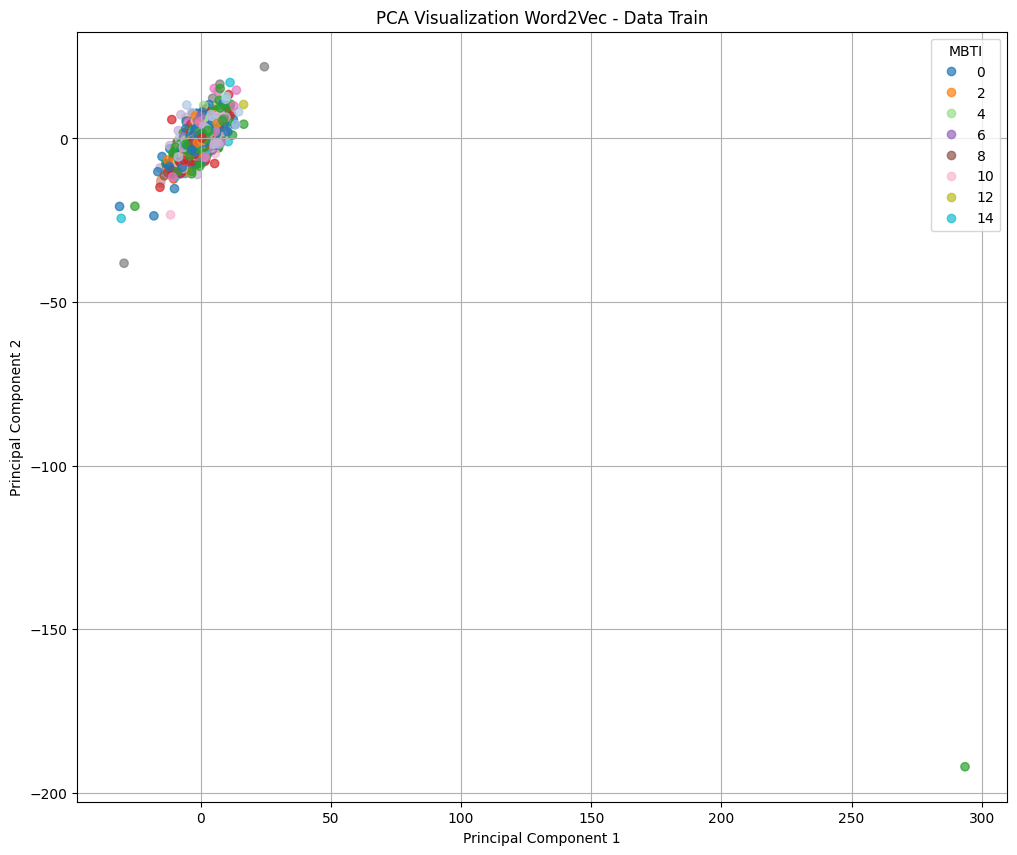

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Lakukan PCA dari vektor hasil Word2Vec (yang sudah di-scale)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Masukkan ke DataFrame dan tambahkan label MBTI
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_train.values

# Visualisasikan
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=pd.factorize(df_pca['MBTI'])[0], cmap='tab20', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="MBTI")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization Word2Vec - Data Train")
plt.grid(True)
plt.show()


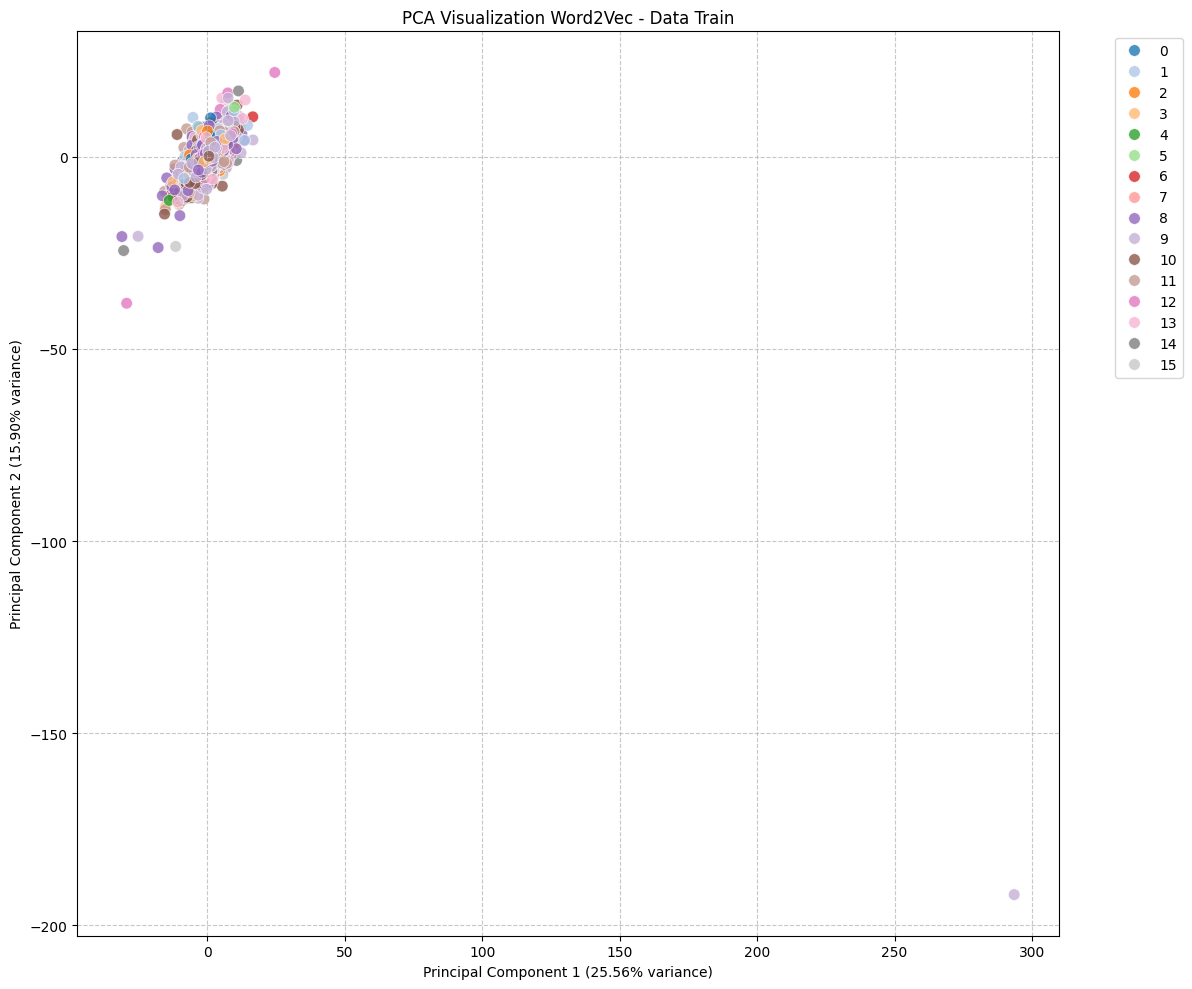

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Lakukan PCA dari vektor hasil Word2Vec (yang sudah di-scale)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_train.values

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5,
)

plt.title("PCA Visualization Word2Vec - Data Train")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

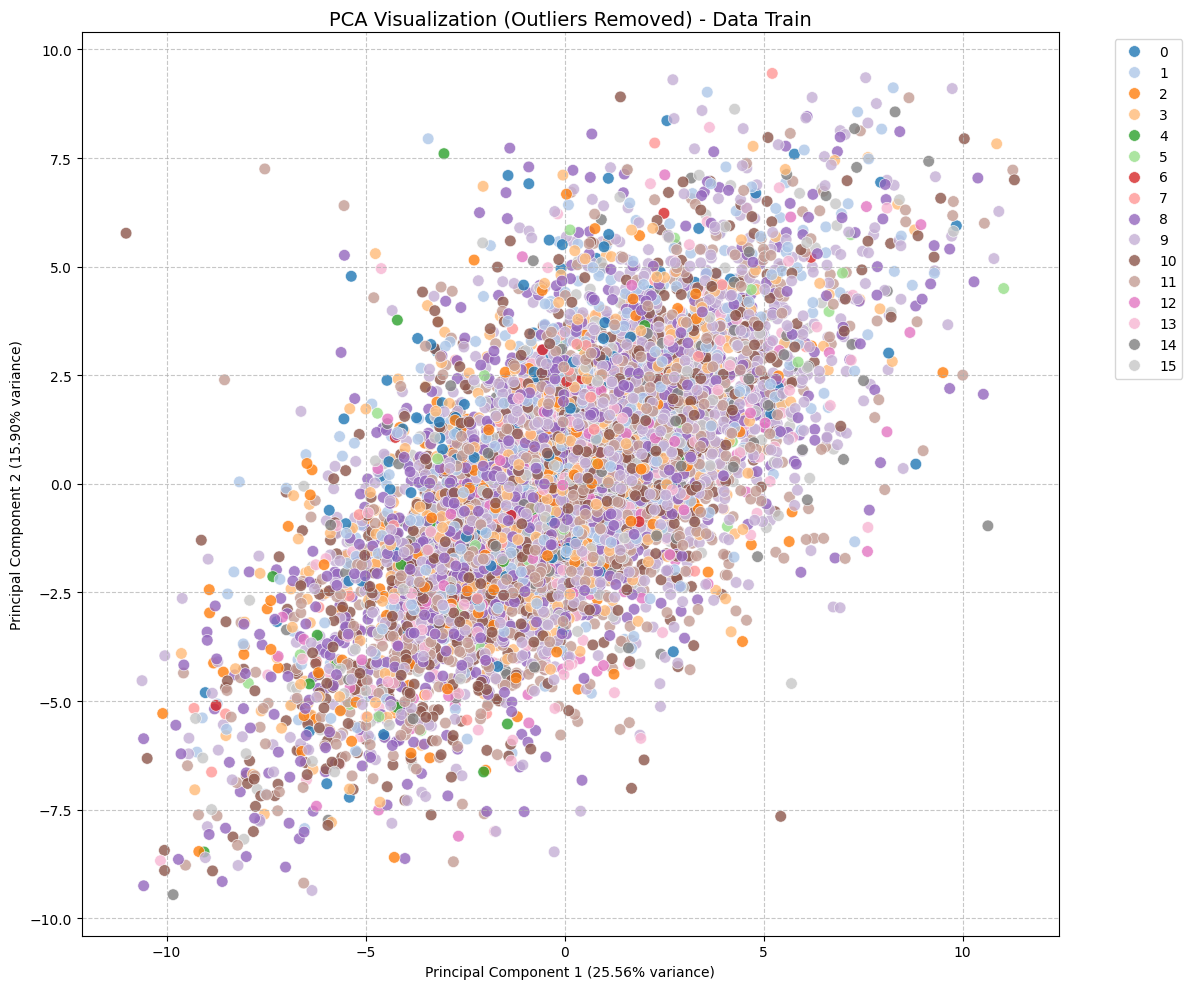

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


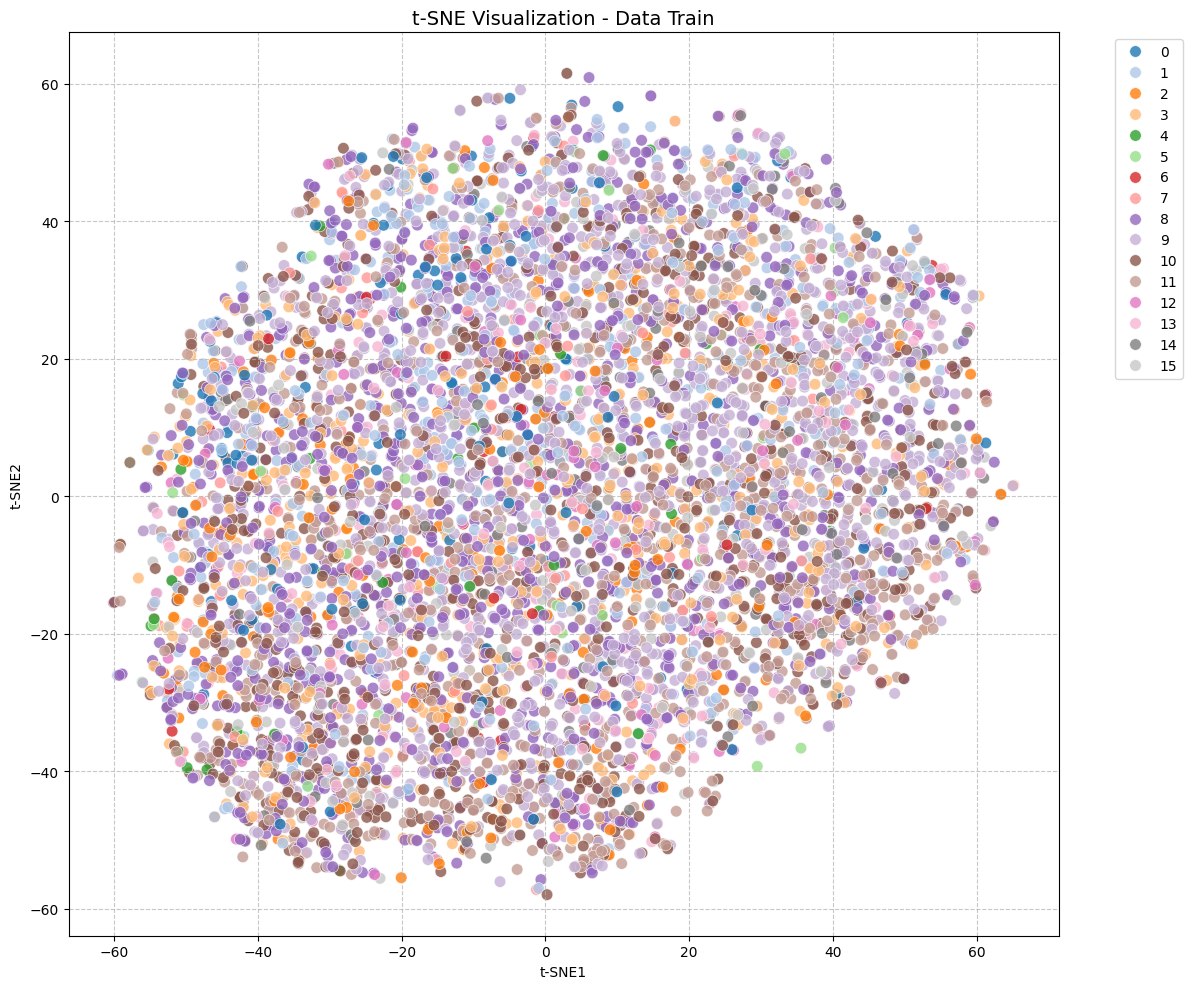

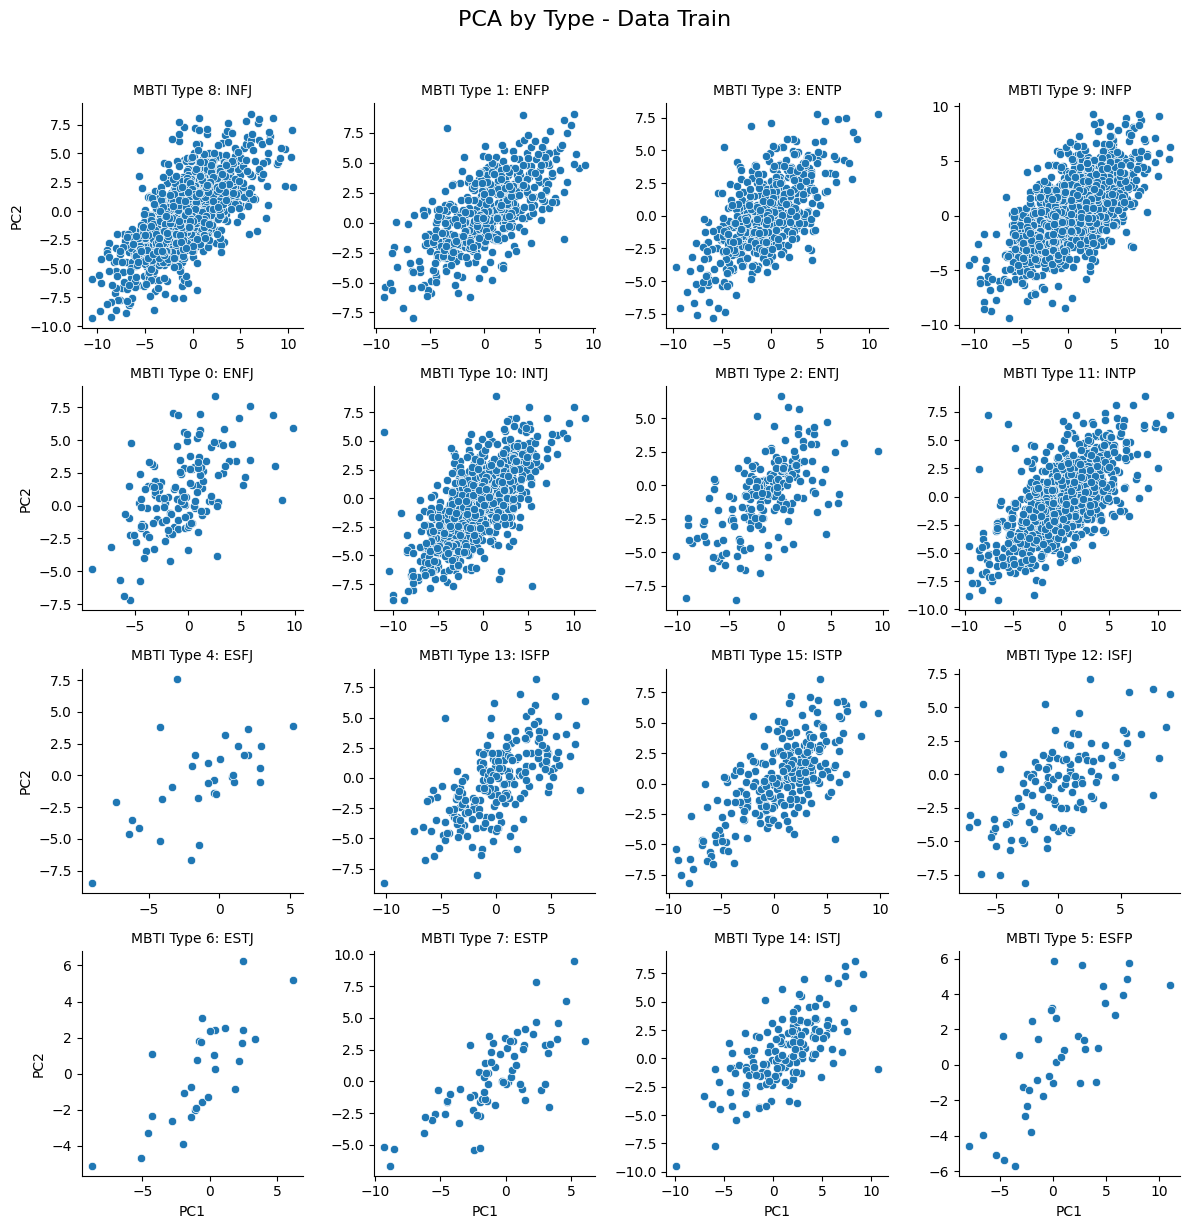

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# PCA no outlier dgn metode IQR
def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Visualisasi PCA dengan dan tanpa outlier
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_train.values

df_pca_clean = remove_outliers_iqr(df_pca, ['PC1', 'PC2'], factor=2.0)

# Plot tanpa outlier
plt.figure(figsize=(12, 10))
plt.title("PCA Visualization (Outliers Removed) - Data Train", fontsize=14)

sns.scatterplot(
    data=df_pca_clean,
    x='PC1', y='PC2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5
)
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# VISUALISASI t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled)
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['MBTI'] = y_train.values

plt.figure(figsize=(12, 10))
plt.title("t-SNE Visualization - Data Train", fontsize=14)
sns.scatterplot(
    data=df_tsne,
    x='t-SNE1', y='t-SNE2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# FACETGRID from seaborn
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
              'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

mbti_types.sort()

# Pemetaan dari nilai encoder numerik ke label type MBTI
mbti_mapping = {i: f"MBTI Type {i}: {mbti}" for i, mbti in enumerate(mbti_types)}

df_pca_clean_plot = df_pca_clean.copy()
df_pca_clean_plot['MBTI_Label'] = df_pca_clean_plot['MBTI'].map(mbti_mapping)

# FacetGrid
g = sns.FacetGrid(df_pca_clean_plot, col="MBTI_Label",
                  col_wrap=4, height=3,
                  sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="PC1", y="PC2")
g.set_titles("{col_name}")
g.fig.suptitle("PCA by Type - Data Train", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### Data Test

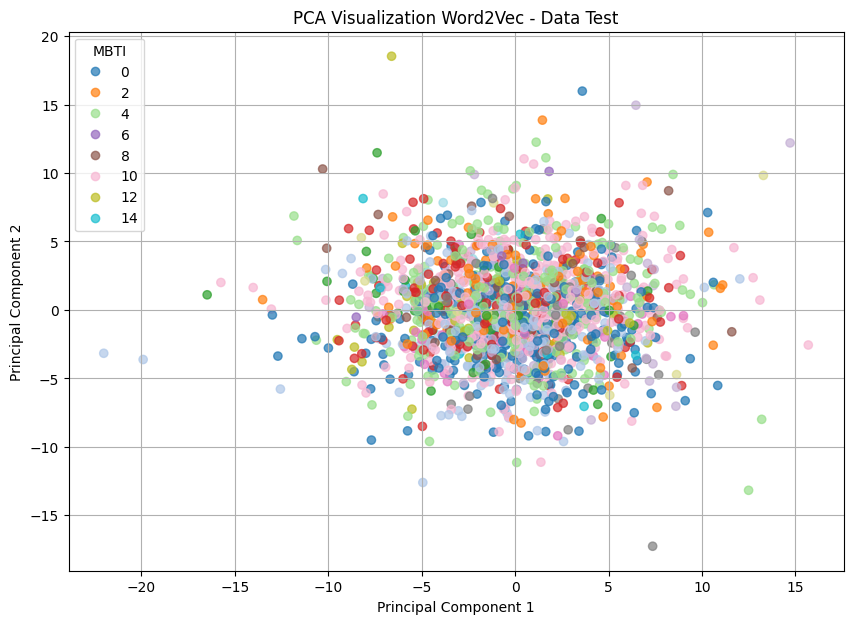

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Lakukan PCA dari vektor hasil Word2Vec (yang sudah di-scale)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

# Masukkan ke DataFrame dan tambahkan label MBTI
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_test.values

# Visualisasikan
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=pd.factorize(df_pca['MBTI'])[0], cmap='tab20', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="MBTI")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization Word2Vec - Data Test")

plt.grid(True)
plt.show()

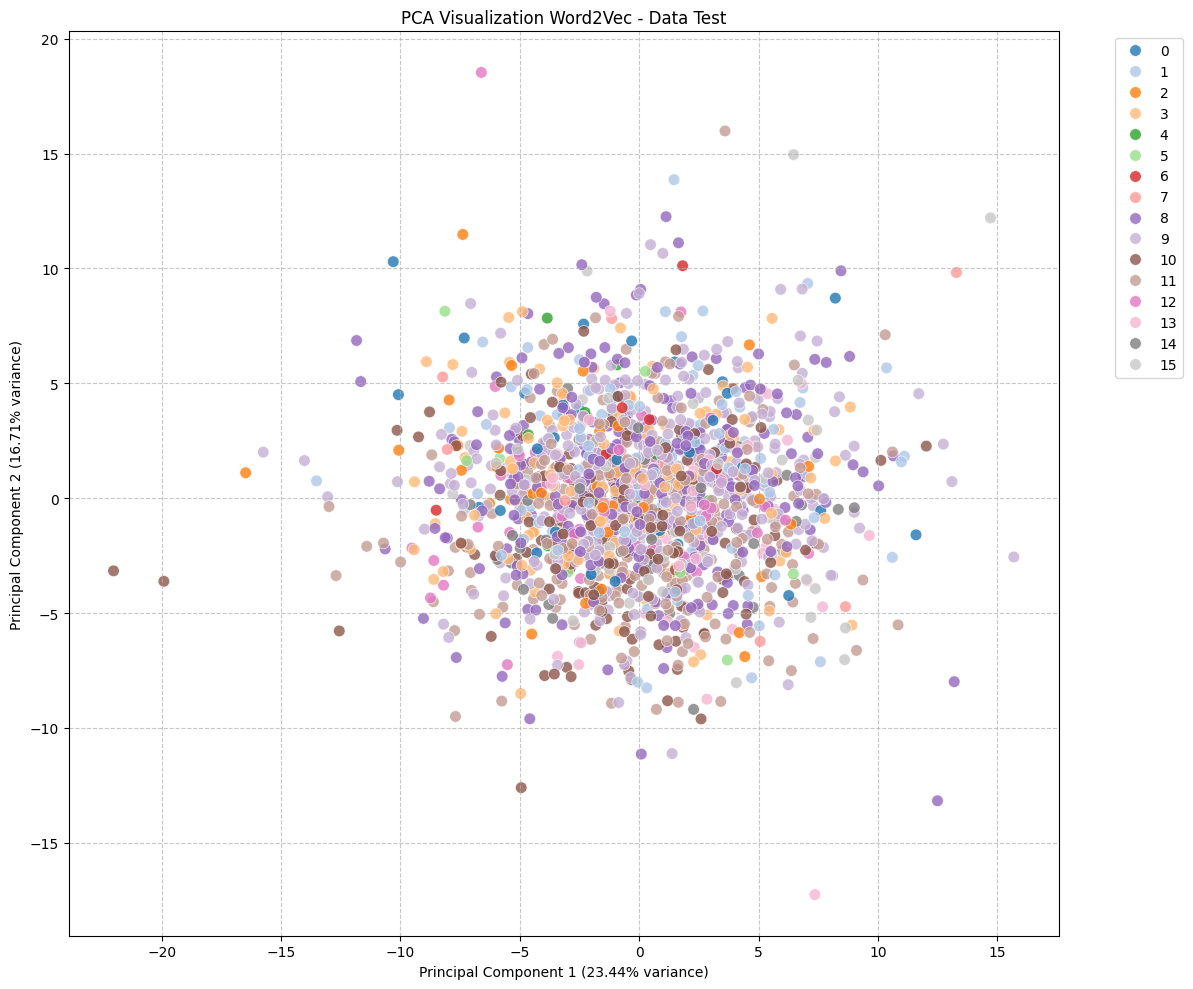

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Lakukan PCA dari vektor hasil Word2Vec (yang sudah di-scale)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_test.values

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5,
)

plt.title("PCA Visualization Word2Vec - Data Test")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

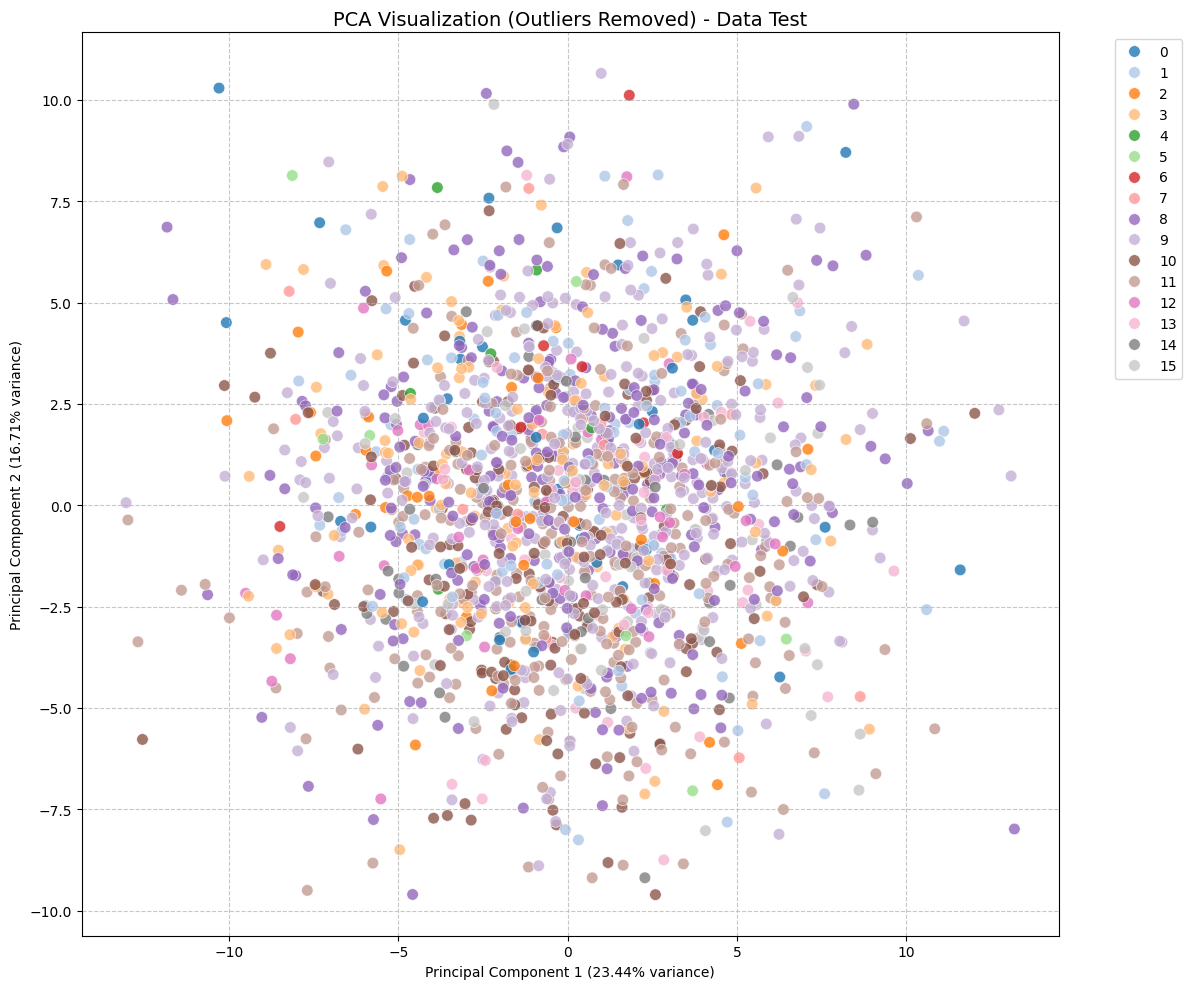

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


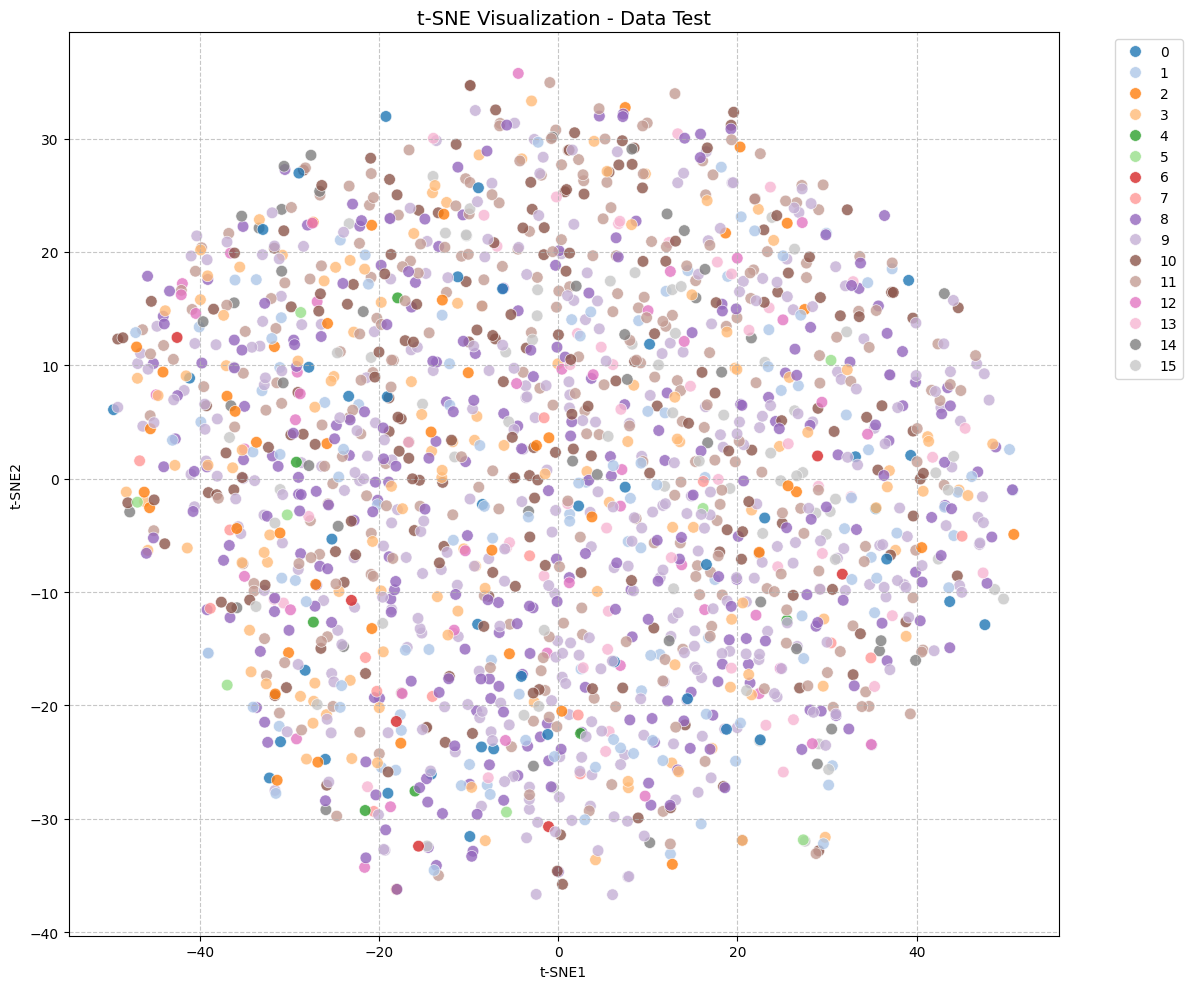

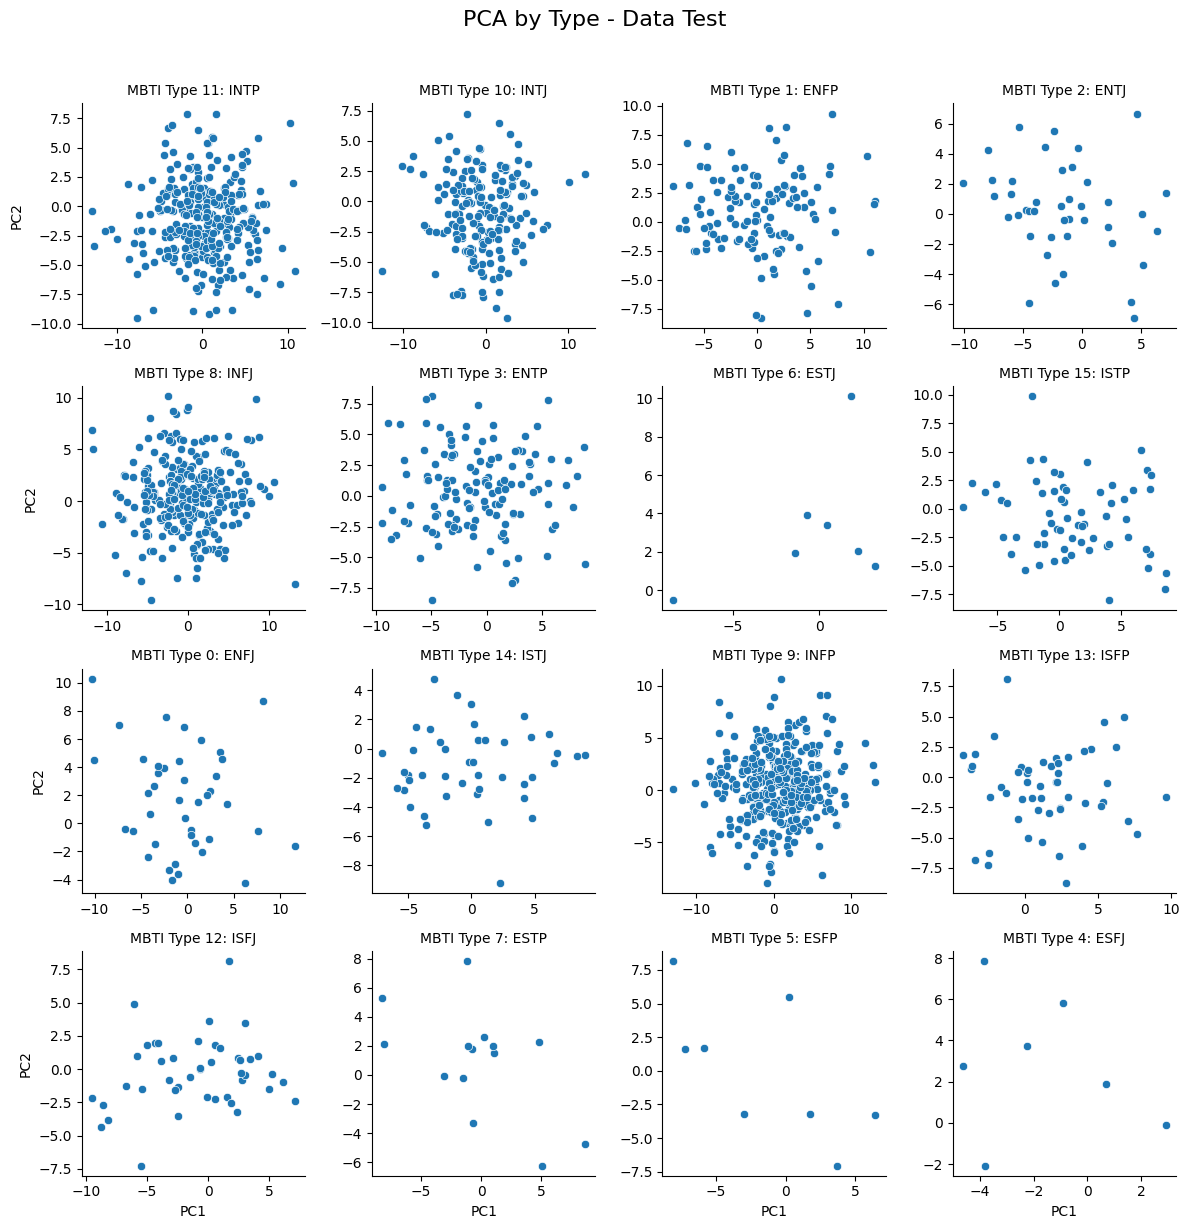

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# PCA no outlier dgn metode IQR
def remove_outliers_iqr(df, cols, factor=1.5):
    df_clean = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Visualisasi PCA dengan dan tanpa outlier
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['MBTI'] = y_test.values

df_pca_clean = remove_outliers_iqr(df_pca, ['PC1', 'PC2'], factor=2.0)

# Plot tanpa outlier
plt.figure(figsize=(12, 10))
plt.title("PCA Visualization (Outliers Removed) - Data Test", fontsize=14)

sns.scatterplot(
    data=df_pca_clean,
    x='PC1', y='PC2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5
)
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# VISUALISASI t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_test_scaled)
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['MBTI'] = y_test.values

plt.figure(figsize=(12, 10))
plt.title("t-SNE Visualization - Data Test", fontsize=14)
sns.scatterplot(
    data=df_tsne,
    x='t-SNE1', y='t-SNE2',
    hue='MBTI',
    palette='tab20',
    alpha=0.8,
    s=70,
    edgecolor='white',
    linewidth=0.5
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# FACETGRID from seaborn
mbti_types = ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
              'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

mbti_types.sort()

# Pemetaan dari nilai encoder numerik ke label type MBTI
mbti_mapping = {i: f"MBTI Type {i}: {mbti}" for i, mbti in enumerate(mbti_types)}

df_pca_clean_plot = df_pca_clean.copy()
df_pca_clean_plot['MBTI_Label'] = df_pca_clean_plot['MBTI'].map(mbti_mapping)

# FacetGrid
g = sns.FacetGrid(df_pca_clean_plot, col="MBTI_Label",
                  col_wrap=4, height=3,
                  sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="PC1", y="PC2")
g.set_titles("{col_name}")
g.fig.suptitle("PCA by Type - Data Test", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## TF-IDF

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

train_df = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/4_train_token.csv')
test_df = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/5_test_token.csv')

# Convert string token list ke list
train_df['token_posts'] = train_df['token_posts'].apply(ast.literal_eval)
test_df['token_posts'] = test_df['token_posts'].apply(ast.literal_eval)

train_texts = train_df['token_posts'].apply(lambda x: ' '.join(x))
test_texts = test_df['token_posts'].apply(lambda x: ' '.join(x))

vectorizer = TfidfVectorizer(min_df=3, max_df=0.75)
X_train_tfidf = vectorizer.fit_transform(train_texts)
X_test_tfidf = vectorizer.transform(test_texts)
y_train = train_df['type']
y_test = test_df['type']

In [ ]:
print(X_train_tfidf.shape)  # (jumlah dokumen, jumlah fitur/term)
print(X_test_tfidf.shape)  # (jumlah dokumen, jumlah fitur/term)

(6940, 29594)
(1735, 29594)


In [ ]:
import pandas as pd

feature_names = vectorizer.get_feature_names_out()
tfidf_train = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
tfidf_test = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

tfidf_train.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_train_tfidf.csv', index=False)
tfidf_test.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_test_tfidf.csv', index=False)
y_train.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_train_tfidf.csv', index=False)
y_test.to_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_test_tfidf.csv', index=False)

# Tampilkan beberapa baris pertama
tfidf_train

aa  aaa  aaaaaaaaah  aaaaaand  aaaaah  aaaaall  aaaaand  aaaah  aaaand  \
0     0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
1     0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
2     0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
3     0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
4     0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
...   ...  ...         ...       ...     ...      ...      ...    ...     ...   
6935  0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
6936  0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
6937  0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
6938  0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   
6939  0.0  0.0         0.0       0.0     0.0      0.0      0.0    0.0     0.0   

      aaadd  ...  zuckerberg  zuflex  zuko  zulban  zumba  zwanglo  zylinder  \
0       0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
1       0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
2       0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
3       0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
4       0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
...     ...  ...         ...     ...   ...     ...    ...      ...       ...   
6935    0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
6936    0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
6937    0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
6938    0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   
6939    0.0  ...         0.0     0.0   0.0     0.0    0.0      0.0       0.0   

      zynthaxx  zzz  zzzzzzzz  
0          0.0  0.0       0.0  
1          0.0  0.0       0.0  
2          0.0  0.0       0.0  
3          0.0  0.0       0.0  
4          0.0  0.0       0.0  
...        ...  ...       ...  
6935       0.0  0.0       0.0  
6936       0.0  0.0       0.0  
6937       0.0  0.0       0.0  
6938       0.0  0.0       0.0  
6939       0.0  0.0       0.0  

[6940 rows x 29594 columns]

In [ ]:
# Mendapatkan daftar semua kata dalam vocabulary
feature_names = vectorizer.get_feature_names_out()

# Indeks dokumen yang ingin dianalisis dari dataset test
test_doc_index = 878  # Ganti dengan indeks yang diinginkan

# Pastikan indeks valid
if test_doc_index >= X_test_tfidf.shape[0]:
    print(f"Indeks {test_doc_index} melebihi jumlah dokumen dalam dataset test ({X_test_tfidf.shape[0]})")
    print("Gunakan indeks yang lebih kecil")
    # Tampilkan indeks maksimum yang tersedia
    print(f"Indeks maksimum yang tersedia: {X_test_tfidf.shape[0] - 1}")
    exit()

# Ambil vektor TF-IDF untuk dokumen test yang dipilih
doc_vector = X_test_tfidf[test_doc_index].toarray()[0]
kepribadian = y_test.iloc[test_doc_index]

# Dapatkan kata-kata dan nilai TF-IDF mereka dalam dokumen ini
word_tfidf_pairs = [(feature_names[i], value) for i, value in enumerate(doc_vector) if value > 0]

# Urutkan berdasarkan nilai TF-IDF tertinggi
word_tfidf_pairs.sort(key=lambda x: x[1], reverse=True)

# Tampilkan informasi
print(f"Analisis dokumen test ke-{test_doc_index}")
print(f"Tipe kepribadian: {kepribadian}")
print(f"Jumlah kata unik dengan nilai TF-IDF > 0: {len(word_tfidf_pairs)}")

# Tampilkan teks asli dari dokumen
print(f"\nTeks asli: {test_texts.iloc[test_doc_index][:150]}...")

print("\nTop 20 kata dengan nilai TF-IDF tertinggi:")
for word, tfidf in word_tfidf_pairs[:20]:
    print(f"Kata: '{word}', TF-IDF: {tfidf}")

# Cari kata dengan nilai TF-IDF spesifik
target_value = 0.46333773079527013
epsilon = 0.0001  # Toleransi untuk perbandingan float

print("\nMencari kata dengan nilai TF-IDF mendekati", target_value)
found = False
for word, tfidf in word_tfidf_pairs:
    if abs(tfidf - target_value) < epsilon:
        print(f"Kata: '{word}', TF-IDF: {tfidf}")
        found = True

if not found:
    print("Tidak ditemukan kata dengan nilai TF-IDF yang mendekati target")

    # Cari nilai yang paling mendekati
    closest_word = min(word_tfidf_pairs, key=lambda x: abs(x[1] - target_value))
    print(f"Kata dengan nilai TF-IDF terdekat: '{closest_word[0]}', nilai: {closest_word[1]}")

# Tampilkan semua nilai spesifik yang disebutkan dalam prompt awal
specific_values = [0.03034002474541748, 0.03259977278164968, 0.027501179138305177,
                  0.06244882588349817, 0.02023302097898542, 0.05591637400958513,
                  0.05600979289305252, 0.04187568068061377, 0.020044392283720913,
                  0.1425659737805497, 0.08441241795844778, 0.04467079794727708,
                  0.1631791446795548, 0.46333773079527013]

print("\nMencari nilai TF-IDF spesifik dari prompt:")
for target in specific_values:
    closest_word = min(word_tfidf_pairs, key=lambda x: abs(x[1] - target))
    diff = abs(closest_word[1] - target)
    if diff < 0.001:  # Lebih dekat dari 0.001
        print(f"Nilai {target}: Kata '{closest_word[0]}' dengan nilai {closest_word[1]}")
    else:
        print(f"Nilai {target}: Tidak ditemukan kata yang mendekati (terdekat: '{closest_word[0]}' dengan nilai {closest_word[1]}, selisih {diff})")

Analisis dokumen test ke-878
Tipe kepribadian: 8
Jumlah kata unik dengan nilai TF-IDF > 0: 228

Teks asli: enfp intj moments sportscenter top ten play prank what lifechange experience life on repeat today may perc experience immerse you the last thing infj ...

Top 20 kata dengan nilai TF-IDF tertinggi:
Kata: 'ban', TF-IDF: 0.4349919903693863
Kata: 'backyard', TF-IDF: 0.16712511740868036
Kata: 'moderation', TF-IDF: 0.16404729519301414
Kata: 'sim', TF-IDF: 0.1551748739107438
Kata: 'artist', TF-IDF: 0.1460134820129529
Kata: 'diary', TF-IDF: 0.14205194411153071
Kata: 'game', TF-IDF: 0.1199726794514309
Kata: 'signature', TF-IDF: 0.11610674918311292
Kata: 'dunce', TF-IDF: 0.1157338102834661
Kata: 'moments', TF-IDF: 0.1157338102834661
Kata: 'workin', TF-IDF: 0.11268078533318698
Kata: 'beetle', TF-IDF: 0.10807721006771007
Kata: 'lifechange', TF-IDF: 0.10319722363489127
Kata: 'marshmellow', TF-IDF: 0.10189320048367569
Kata: 'grumble', TF-IDF: 0.10070272061839193
Kata: 'roach', TF-IDF: 0.099607

In [ ]:
# Mendapatkan daftar semua kata dalam vocabulary
feature_names = vectorizer.get_feature_names_out()

# Fungsi untuk menganalisis kalimat baru
def analyze_sentence(sentence, vectorizer, feature_names):
    # Transform kalimat menjadi vektor TF-IDF
    sentence_vector = vectorizer.transform([sentence]).toarray()[0]

    # Dapatkan kata-kata dan nilai TF-IDF mereka dalam kalimat ini
    word_tfidf_pairs = [(feature_names[i], value) for i, value in enumerate(sentence_vector) if value > 0]

    # Urutkan berdasarkan nilai TF-IDF tertinggi
    word_tfidf_pairs.sort(key=lambda x: x[1], reverse=True)

    return word_tfidf_pairs

# Kalimat yang ingin dianalisis
# Anda bisa menggunakan kalimat dari contoh awal
# sample_sentence = "enfp intj moments sportscenter top ten play prank what lifechange experience life on repeat today may perc experience immerse you the last thing infj friend post facebook commit"

# Atau memilih kalimat dari dataset
sample_index = 878  # Ganti dengan indeks yang diinginkan
sample_sentence = test_texts.iloc[sample_index]

print(f"Menganalisis kalimat: \n{sample_sentence}\n")

# Analisis kalimat
word_tfidf_pairs = analyze_sentence(sample_sentence, vectorizer, feature_names)

print(f"Jumlah kata dengan nilai TF-IDF > 0: {len(word_tfidf_pairs)}")

# Tampilkan semua kata beserta nilai TF-IDF mereka
print("\nDaftar kata dengan nilai TF-IDF:")
for word, tfidf in word_tfidf_pairs:
    print(f"Kata: '{word}', TF-IDF: {tfidf}")

# Jika ingin cek nilai spesifik
target_values = [0.03034002474541748, 0.03259977278164968, 0.027501179138305177,
               0.06244882588349817, 0.02023302097898542, 0.05591637400958513,
               0.05600979289305252, 0.04187568068061377, 0.020044392283720913,
               0.1425659737805497, 0.08441241795844778, 0.04467079794727708,
               0.1631791446795548]

print("\nMencari nilai TF-IDF spesifik dari prompt:")
for target in target_values:
    epsilon = 0.0001  # Toleransi untuk perbandingan float
    found = False
    for word, tfidf in word_tfidf_pairs:
        if abs(tfidf - target) < epsilon:
            print(f"Nilai {target}: Kata '{word}'")
            found = True
            break

    if not found:
        # Cari yang paling mendekati
        if word_tfidf_pairs:
            closest_word = min(word_tfidf_pairs, key=lambda x: abs(x[1] - target))
            diff = abs(closest_word[1] - target)
            print(f"Nilai {target}: Tidak ditemukan (terdekat: '{closest_word[0]}' dengan nilai {closest_word[1]}, selisih {diff})")
        else:
            print(f"Nilai {target}: Tidak ditemukan kata dengan TF-IDF > 0 dalam kalimat ini")

Menganalisis kalimat: 
enfp intj moments sportscenter top ten play prank what lifechange experience life on repeat today may perc experience immerse you the last thing infj friend post facebook commit suicide next day rest peace hello enfj sorry hear distress its natural relationship perfection time every moment existence try figure hard time time growth as welcome stuff game set match prozac wellbrutin least thirty minute move leg and I mean move sit desk chair weed moderation maybe try edible healthy alternative basically come three item determine type or whichever type want do would likely use give type cognitive function whatnot leave by all thing moderation sim indeed video game good one that note good one somewhat subjective I completely promote death give sim dear enfp what favorite video game grow now current favorite video game cool it appear late sad there s someone everyone wait I think confidence good thing I cherish time solitude bc revel within inner world whereas time wo

### Visualization

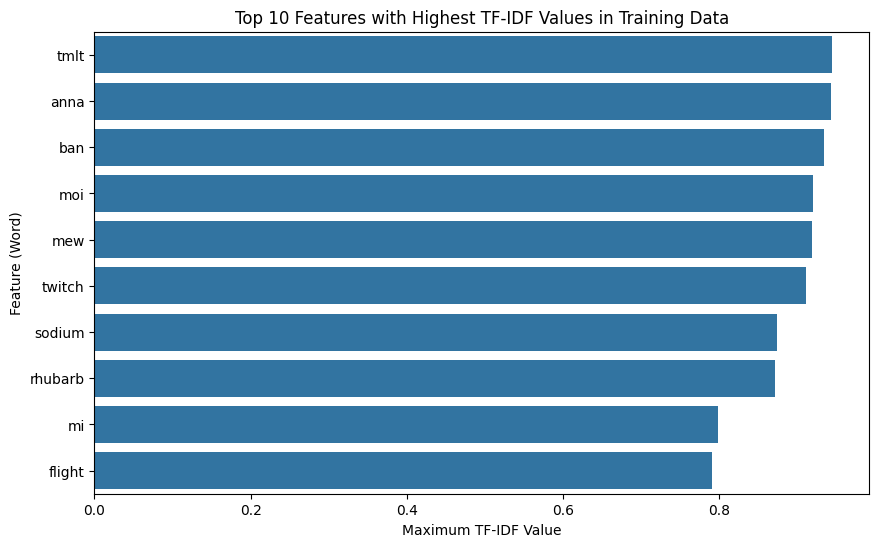

In [ ]:
# visualisasi nilai tertinggi untuk data train tf-idf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tfidf_train = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_train_tfidf.csv')

# Find the maximum TF-IDF value for each feature (column)
max_tfidf_values = tfidf_train.max()

# Sort the features by their maximum TF-IDF values in descending order
sorted_max_tfidf = max_tfidf_values.sort_values(ascending=False)

# top N features (e.g., top 10)
top_n = 10
top_features = sorted_max_tfidf.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.xlabel("Maximum TF-IDF Value")
plt.ylabel("Feature (Word)")
plt.title(f"Top {top_n} Features with Highest TF-IDF Values in Training Data")
plt.show()


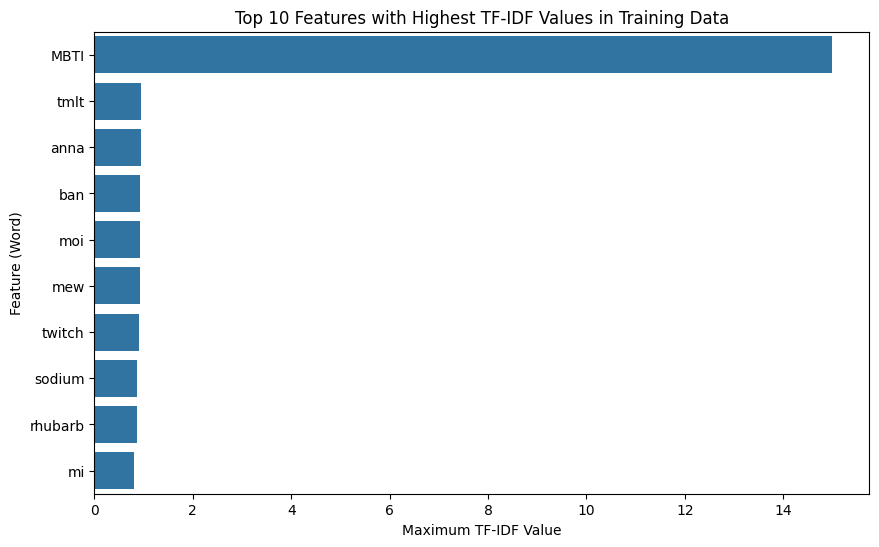

In [ ]:
# visualisasi nilai tertinggi untuk data train tf-idf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tfidf_test = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_test_tfidf.csv')

# Find the maximum TF-IDF value for each feature (column)
max_tfidf_values = tfidf_train.max()

# Sort the features by their maximum TF-IDF values in descending order
sorted_max_tfidf = max_tfidf_values.sort_values(ascending=False)

# top N features (e.g., top 10)
top_n = 10
top_features = sorted_max_tfidf.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.xlabel("Maximum TF-IDF Value")
plt.ylabel("Feature (Word)")
plt.title(f"Top {top_n} Features with Highest TF-IDF Values in Training Data")
plt.show()


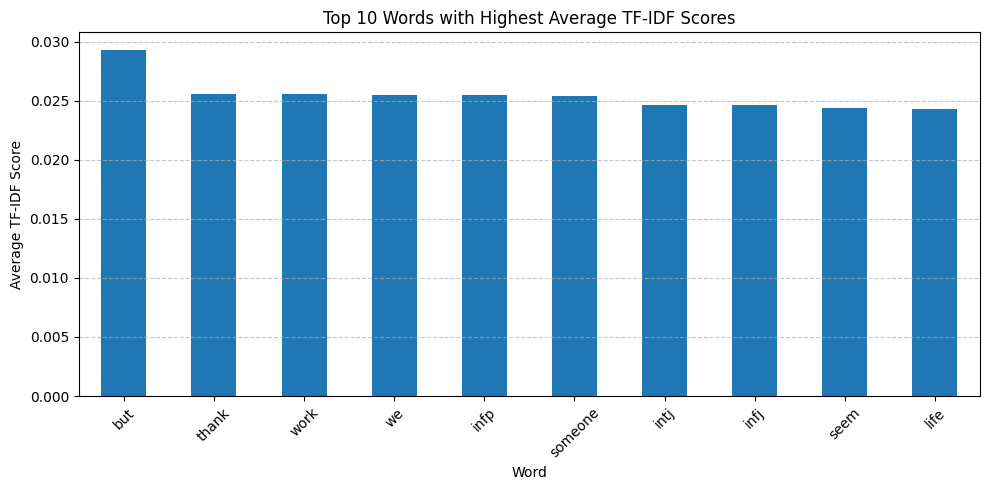

In [ ]:
import matplotlib.pyplot as plt

mean_scores = tfidf_train.mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
mean_scores.plot(kind='bar')
plt.title("Top 10 Words with Highest Average TF-IDF Scores")
plt.ylabel("Average TF-IDF Score")
plt.xlabel("Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


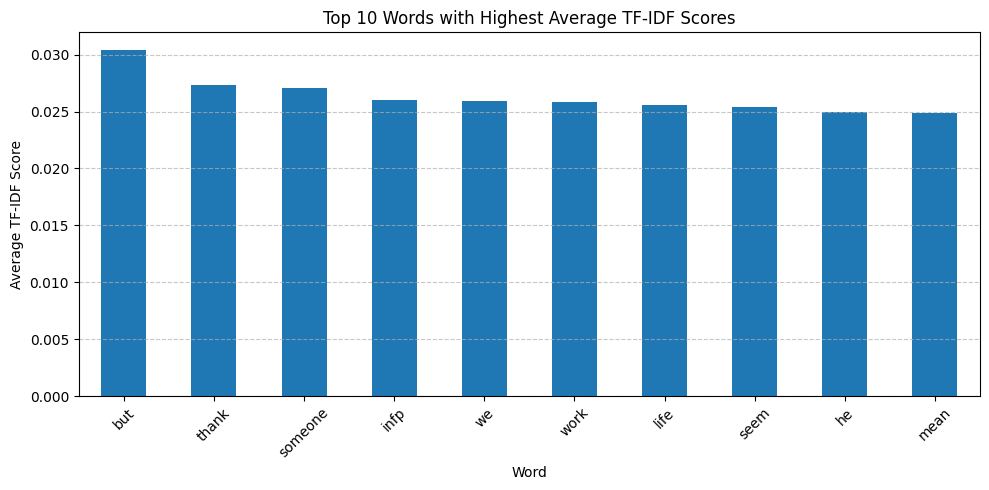

In [ ]:
import matplotlib.pyplot as plt

mean_scores = tfidf_test.mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
mean_scores.plot(kind='bar')
plt.title("Top 10 Words with Highest Average TF-IDF Scores")
plt.ylabel("Average TF-IDF Score")
plt.xlabel("Word")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


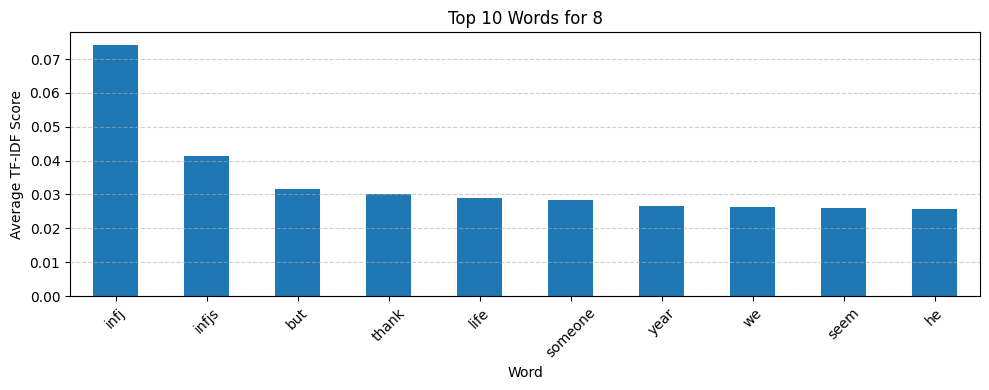

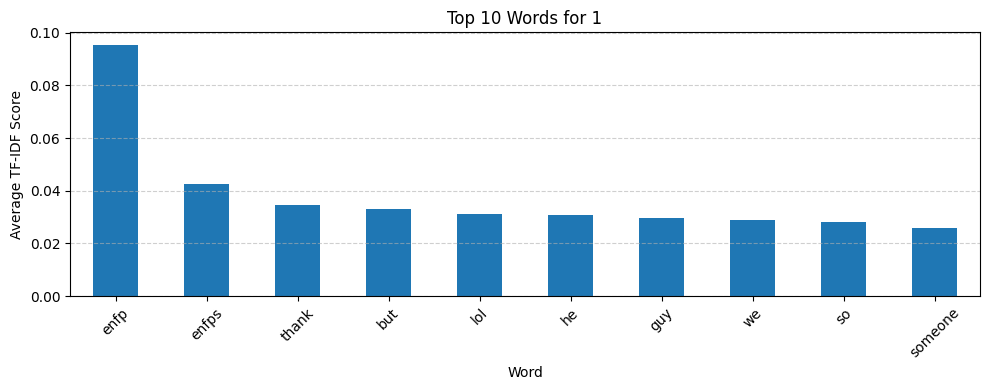

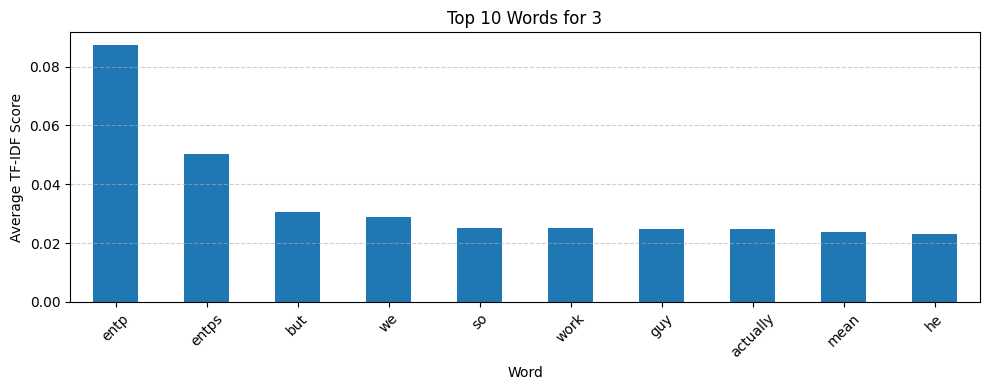

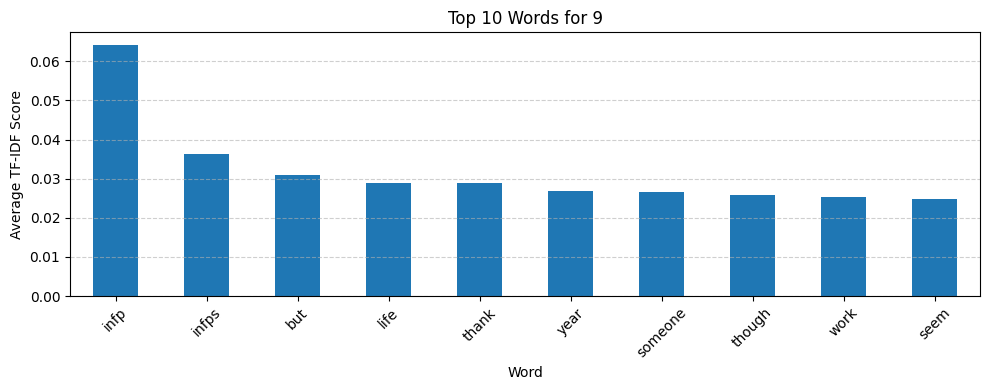

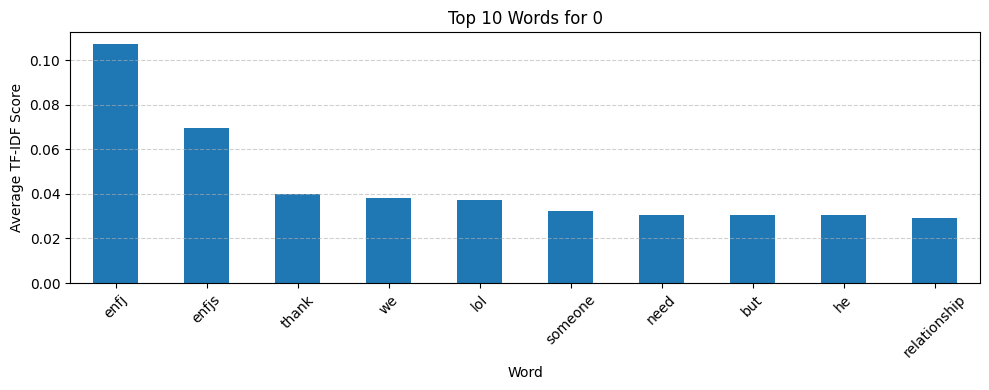

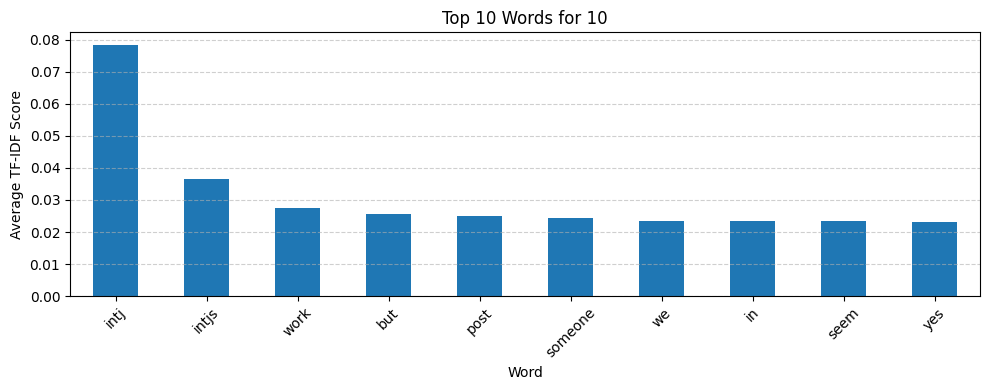

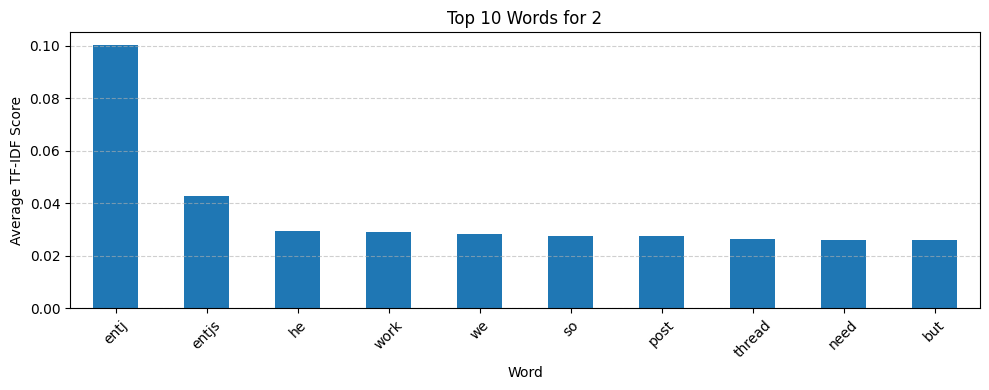

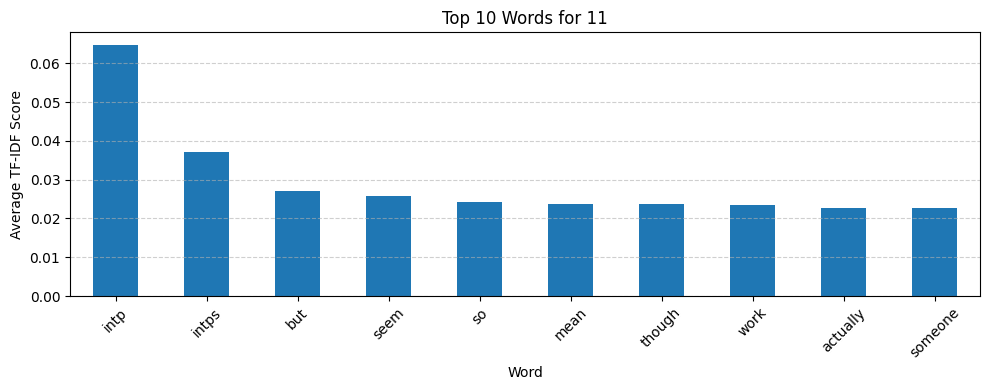

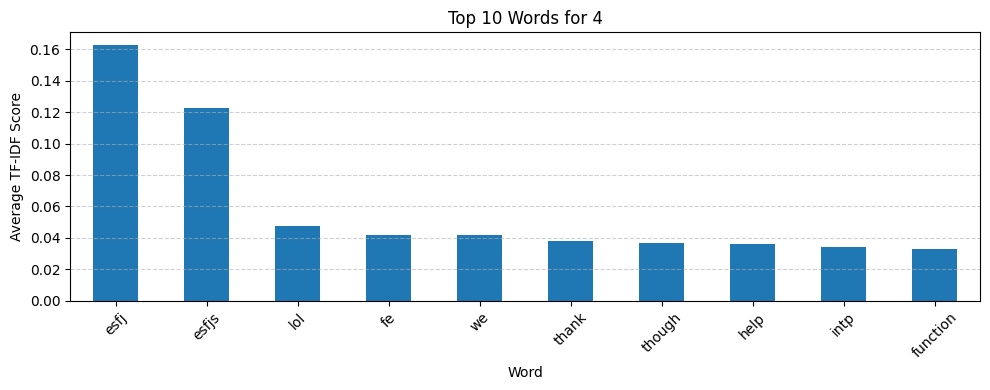

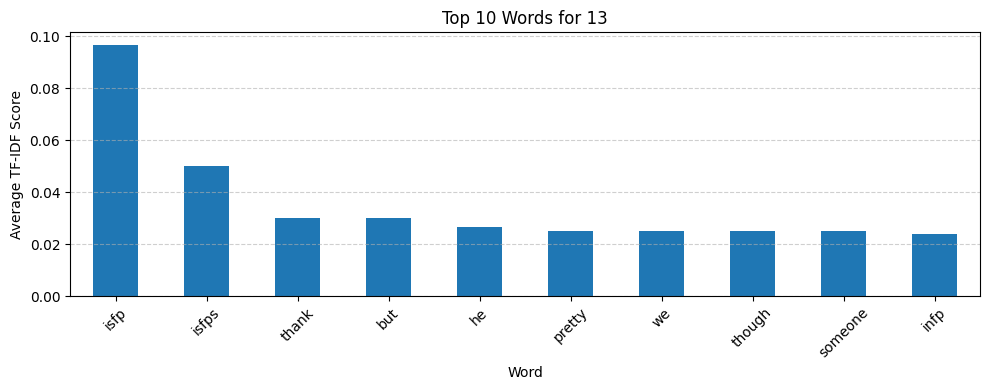

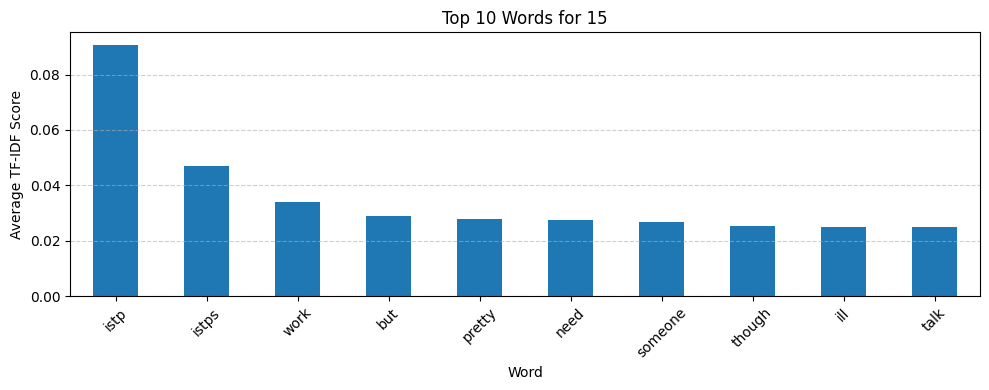

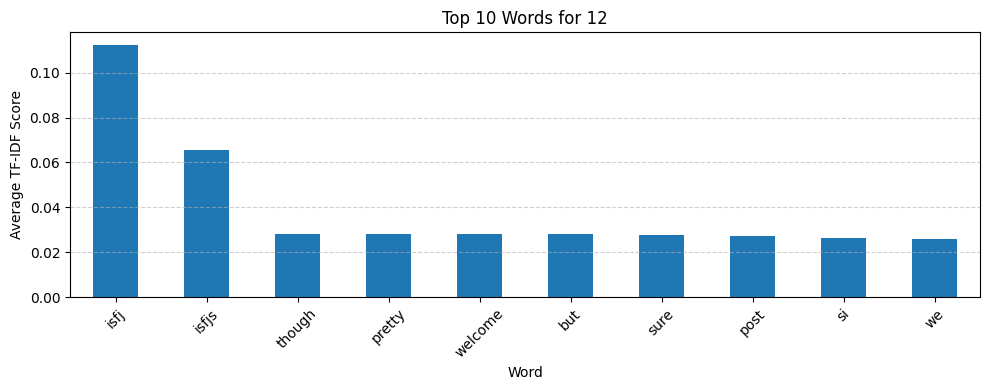

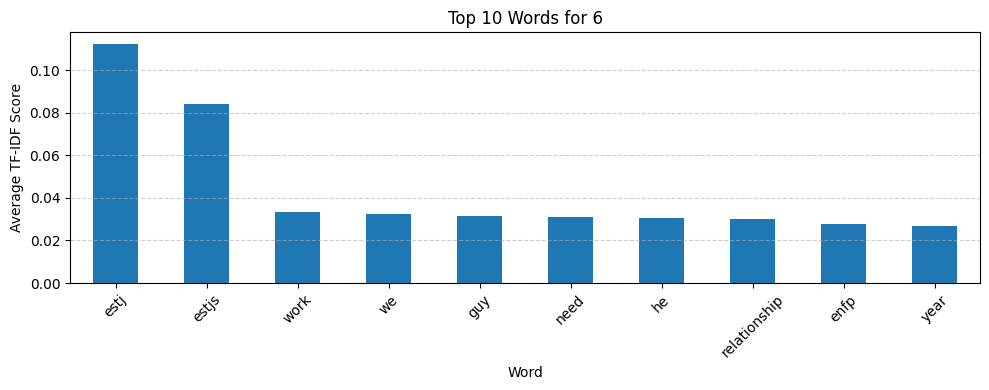

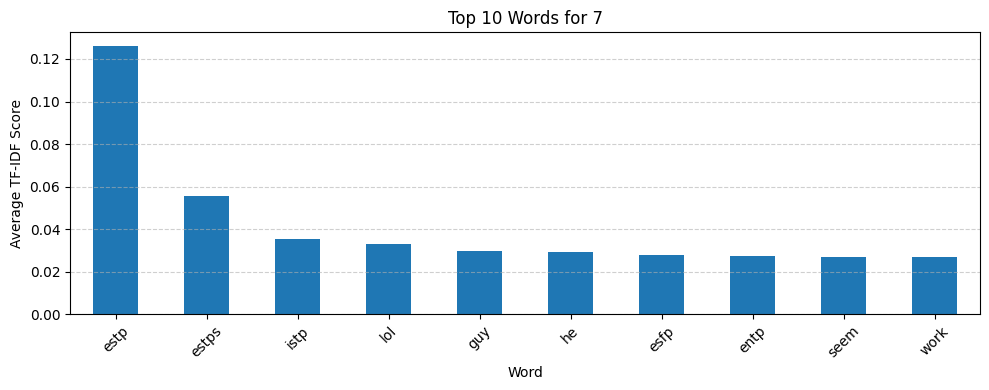

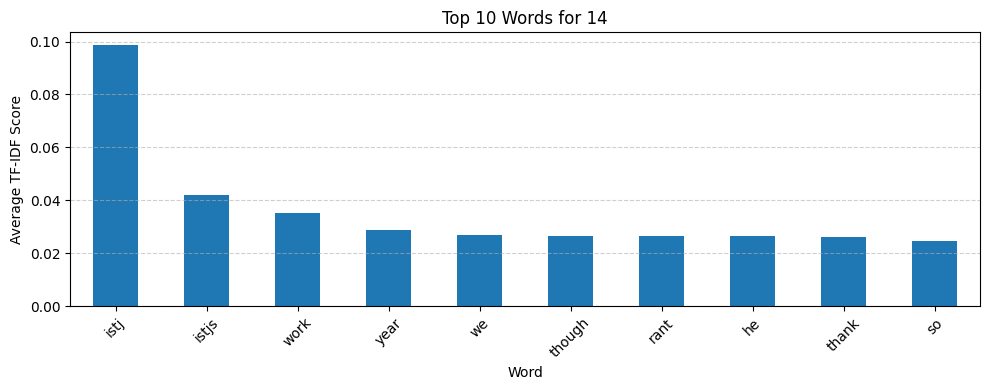

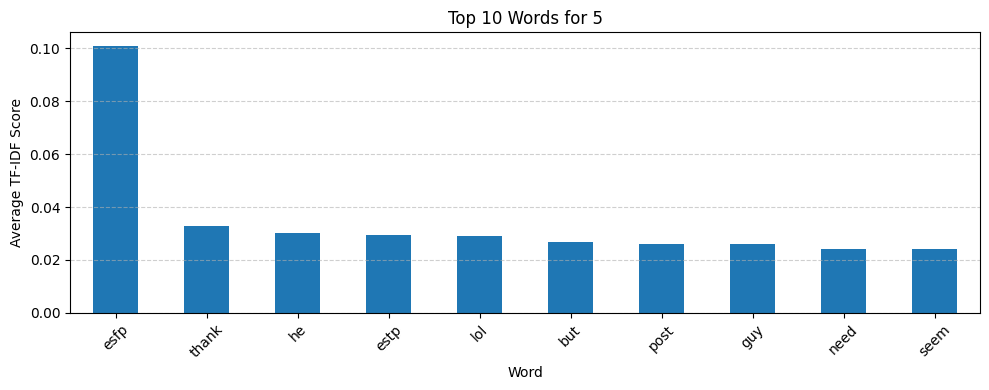

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
tfidf_train = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_train_tfidf.csv')
y_train = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_train_tfidf.csv')

# Gabungkan TF-IDF dan label
tfidf_train['MBTI'] = y_train['type']

# 2. Loop untuk setiap tipe MBTI
unique_types =tfidf_train['MBTI'].unique()

for mbti in unique_types:
    # Filter data berdasarkan tipe
    group = tfidf_train[tfidf_train['MBTI'] == mbti].drop(columns='MBTI')

    # Hitung rata-rata tf-idf per kata
    mean_tfidf = group.mean().sort_values(ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 4))
    mean_tfidf.plot(kind='bar')
    plt.title(f"Top 10 Words for {mbti}")
    plt.ylabel("Average TF-IDF Score")
    plt.xlabel("Word")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


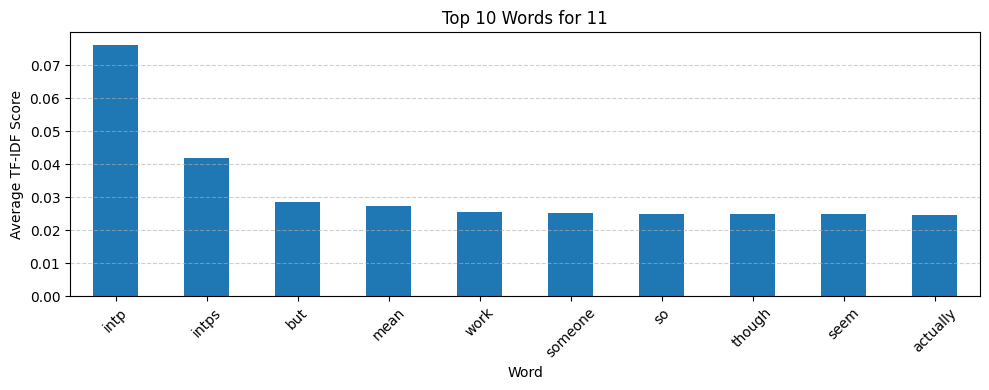

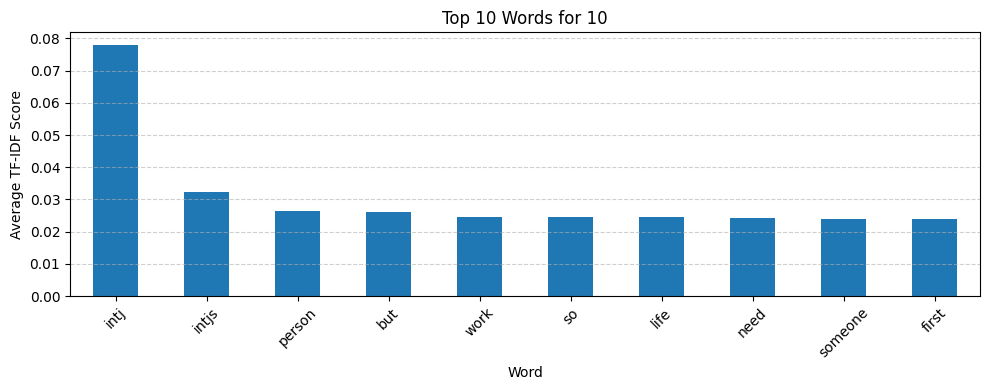

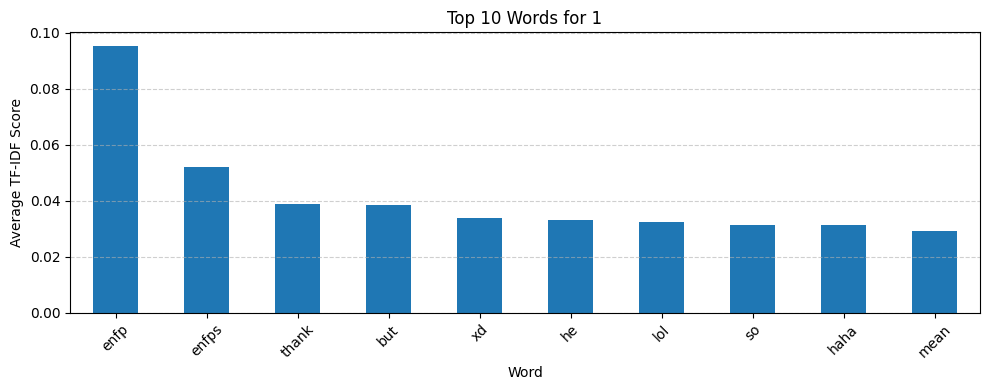

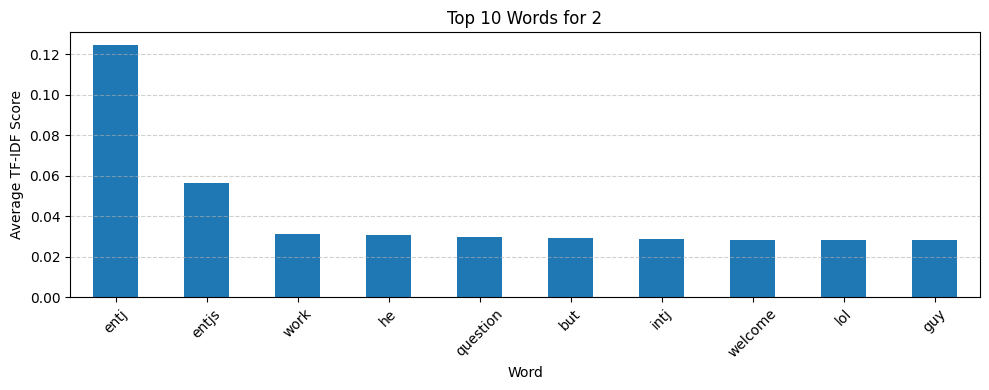

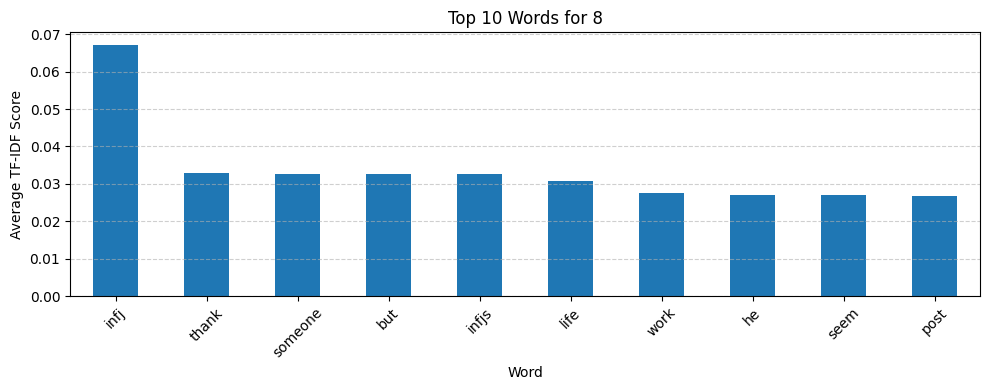

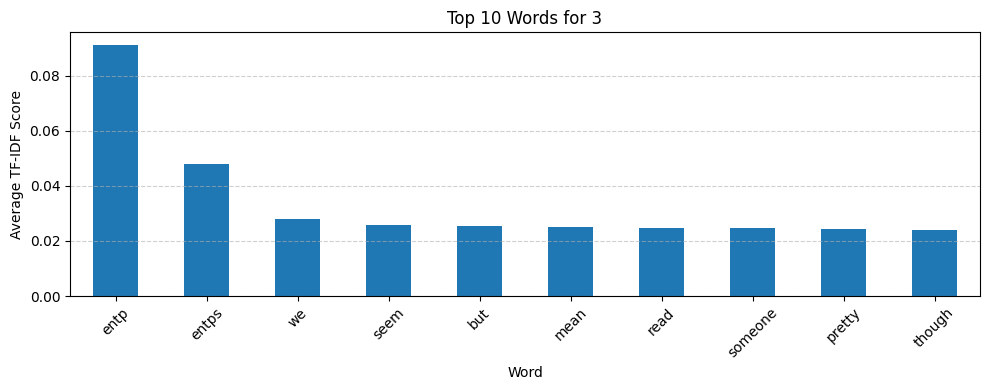

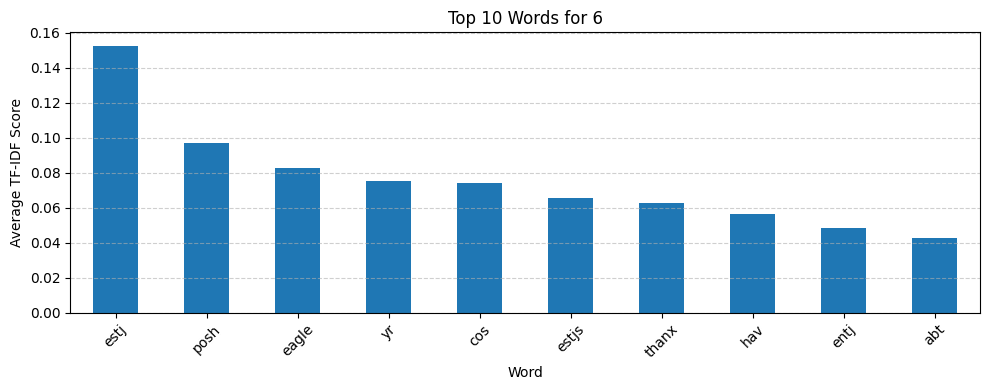

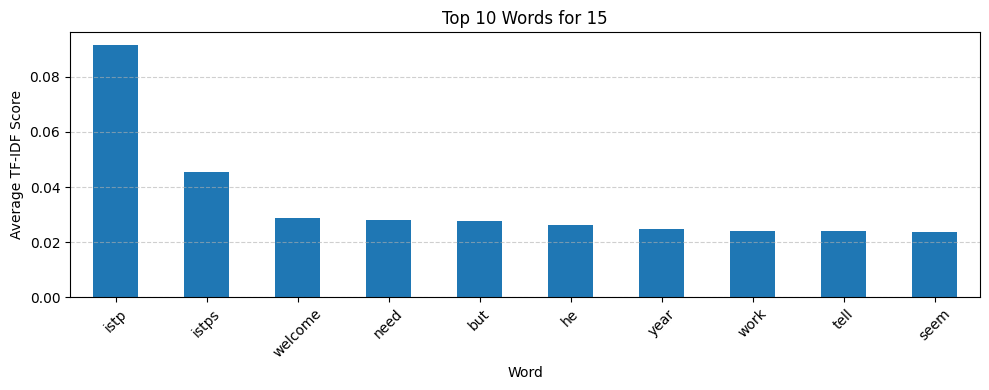

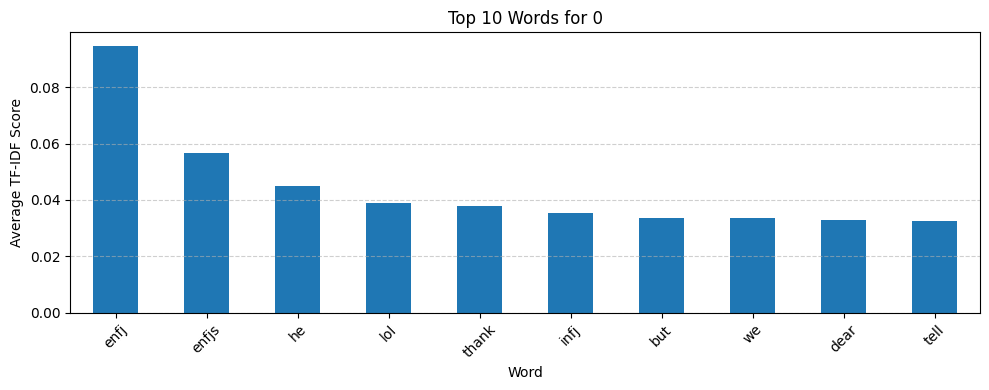

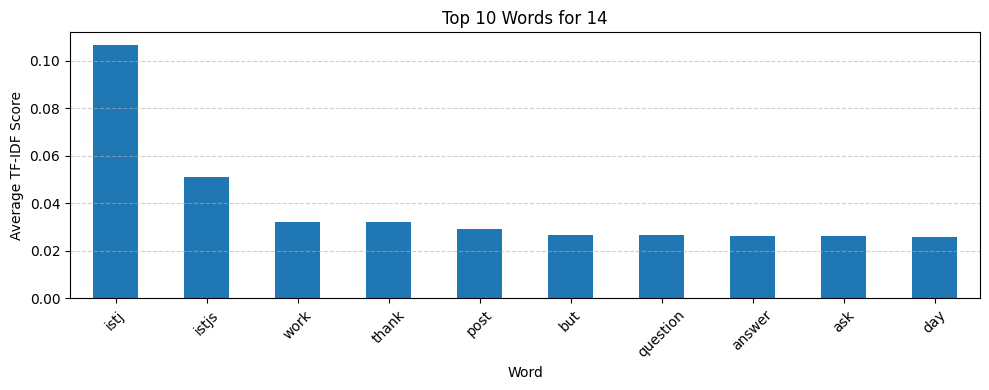

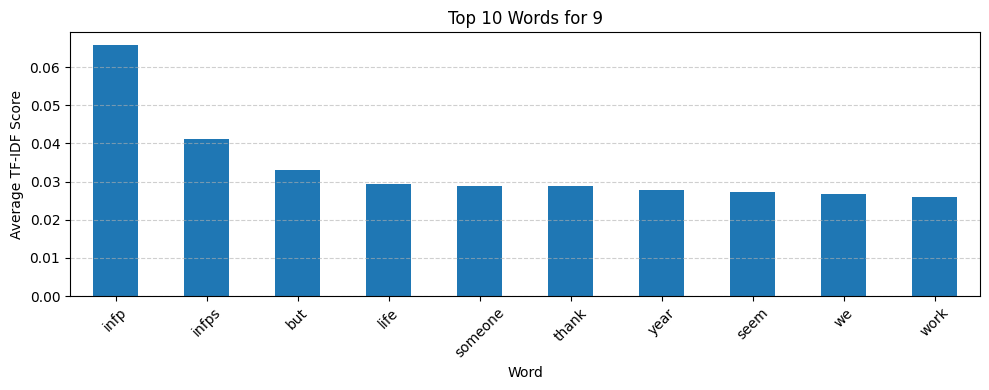

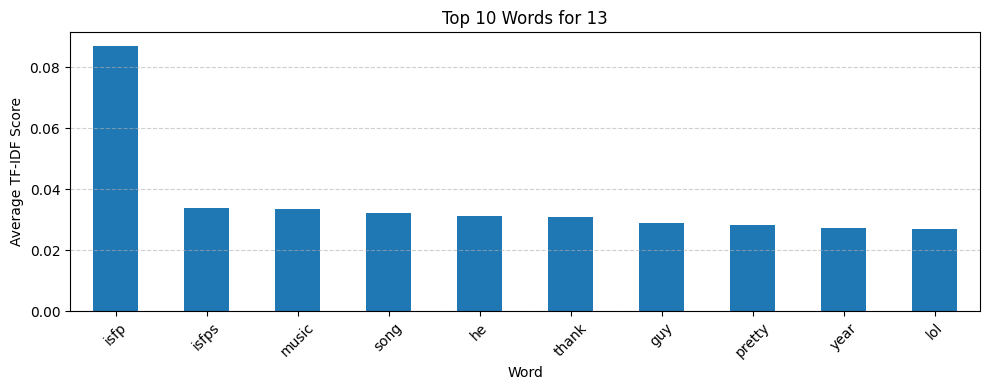

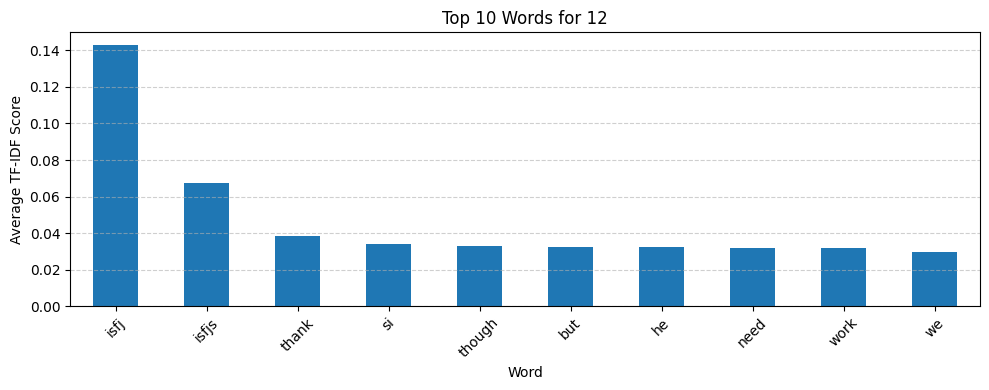

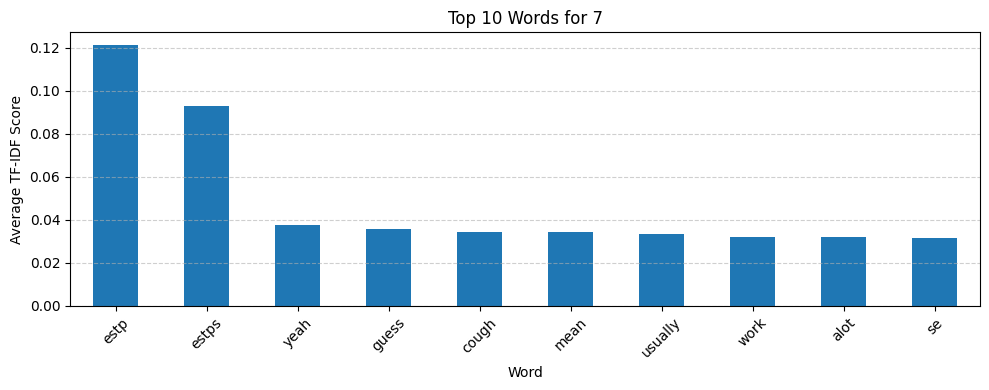

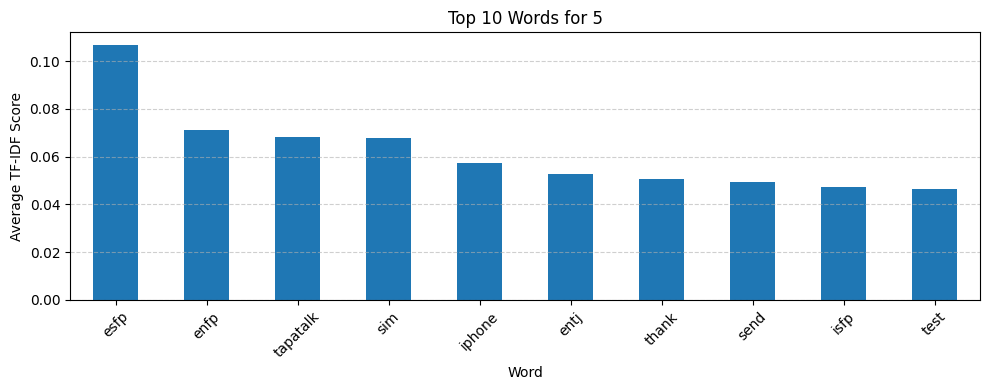

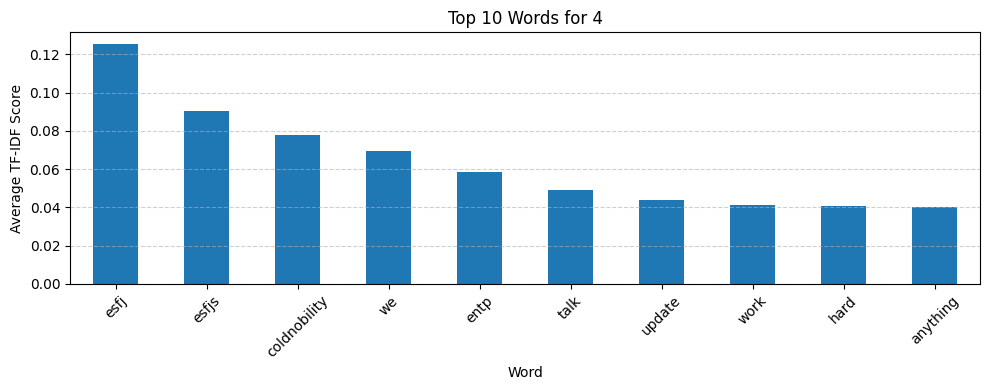

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
tfidf_test = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/X_test_tfidf.csv')
y_test = pd.read_csv('/content/drive/MyDrive/6. TUGAS AKHIR/0. DATASET/y_test_tfidf.csv')

# Gabungkan TF-IDF dan label
tfidf_test['MBTI'] = y_test['type']

# 2. Loop untuk setiap tipe MBTI
unique_types =tfidf_test['MBTI'].unique()

for mbti in unique_types:
    # Filter data berdasarkan tipe
    group = tfidf_test[tfidf_test['MBTI'] == mbti].drop(columns='MBTI')

    # Hitung rata-rata tf-idf per kata
    mean_tfidf = group.mean().sort_values(ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10, 4))
    mean_tfidf.plot(kind='bar')
    plt.title(f"Top 10 Words for {mbti}")
    plt.ylabel("Average TF-IDF Score")
    plt.xlabel("Word")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


# KNN

### Word2VEC

In [ ]:
# KNN with Word2VEC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=48)
knn_classifier.fit(X_train_vectors, y_train)

y_pred = knn_classifier.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Evaluation Metrics:\n", classification_report(y_test, y_pred))

Accuracy: 0.2420749279538905
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.17      0.03      0.05       125
           2       0.00      0.00      0.00        44
           3       0.13      0.03      0.05       135
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        15
           8       0.20      0.36      0.26       288
           9       0.28      0.59      0.38       370
          10       0.17      0.11      0.13       193
          11       0.26      0.24      0.25       293
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00        53
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        67

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### TF-IDF

In [ ]:
# KNN with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=60)
knn_classifier.fit(X_train_tfidf, y_train)

y_pred = knn_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Evaluation Metrics:\n", classification_report(y_test, y_pred))

Accuracy: 0.5423631123919308
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.61      0.27      0.37        41
           1       0.63      0.61      0.62       125
           2       0.88      0.32      0.47        44
           3       0.75      0.30      0.43       135
           4       0.29      0.29      0.29         7
           5       0.00      0.00      0.00         8
           6       1.00      0.29      0.44         7
           7       1.00      0.27      0.42        15
           8       0.41      0.77      0.54       288
           9       0.48      0.79      0.60       370
          10       0.64      0.41      0.50       193
          11       0.82      0.48      0.61       293
          12       0.93      0.31      0.47        45
          13       0.82      0.17      0.28        53
          14       0.75      0.27      0.40        44
          15       0.88      0.33      0.48        67

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# KNN with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=55)
knn_classifier.fit(X_train_tfidf, y_train)

y_pred = knn_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Evaluation Metrics:\n", classification_report(y_test, y_pred))

Accuracy: 0.5354466858789625
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.58      0.27      0.37        41
           1       0.64      0.58      0.61       125
           2       0.88      0.32      0.47        44
           3       0.72      0.31      0.44       135
           4       0.25      0.29      0.27         7
           5       0.00      0.00      0.00         8
           6       1.00      0.29      0.44         7
           7       1.00      0.33      0.50        15
           8       0.43      0.71      0.54       288
           9       0.44      0.81      0.57       370
          10       0.62      0.39      0.48       193
          11       0.83      0.48      0.61       293
          12       0.94      0.38      0.54        45
          13       0.79      0.21      0.33        53
          14       0.73      0.25      0.37        44
          15       0.88      0.33      0.48        67

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# MLP

### Word2VEC

In [ ]:
# MLP with Word2VEC
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,75,100), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp_classifier.fit(X_train_vectors, y_train)

y_pred_mlp = mlp_classifier.predict(X_test_vectors)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"Accuracy: {accuracy_mlp}")
print("Evaluation Metrics:\n", classification_report(y_test, y_pred_mlp))

Accuracy: 0.3037463976945245
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.38      0.02      0.05       125
           2       0.00      0.00      0.00        44
           3       0.19      0.04      0.06       135
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        15
           8       0.25      0.31      0.28       288
           9       0.36      0.63      0.46       370
          10       0.25      0.34      0.29       193
          11       0.31      0.44      0.36       293
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00        53
          14       0.00      0.00      0.00        44
          15       0.00      0.00      0.00        67

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### TF-IDF

In [ ]:
# MLP with TF-IDF
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,100), max_iter=300, random_state=42)
mlp_classifier.fit(X_train_tfidf, y_train)

y_pred = mlp_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Evaluation Metrics:\n", classification_report(y_test, y_pred))

Accuracy: 0.5723342939481268
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.39      0.22      0.28        41
           1       0.55      0.54      0.55       125
           2       0.78      0.41      0.54        44
           3       0.59      0.45      0.51       135
           4       0.50      0.29      0.36         7
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       1.00      0.27      0.42        15
           8       0.55      0.58      0.56       288
           9       0.60      0.75      0.67       370
          10       0.45      0.59      0.51       193
          11       0.63      0.70      0.66       293
          12       0.90      0.20      0.33        45
          13       0.46      0.23      0.30        53
          14       0.67      0.32      0.43        44
          15       0.65      0.45      0.53        67

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, activation='relu', solver='adam', random_state=42)) # Parameter
])

mlp_pipeline.fit(X_train, y_train)

y_pred = mlp_pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Evaluation Metrics:\n", classification)

Accuracy: 0.9397919154016715
Evaluation Metrics:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       376
           1       0.97      0.94      0.96       360
           2       1.00      1.00      1.00       401
           3       0.91      0.94      0.93       344
           4       1.00      1.00      1.00       382
           5       1.00      1.00      1.00       371
           6       1.00      1.00      1.00       351
           7       1.00      1.00      1.00       391
           8       0.81      0.71      0.76       360
           9       0.69      0.75      0.72       345
          10       0.85      0.85      0.85       379
          11       0.84      0.82      0.83       344
          12       0.99      1.00      1.00       350
          13       1.00      0.99      1.00       387
          14       0.99      1.00      1.00       353
          15       0.99      0.99      0.99       369

    accuracy                  